# Table of Contents

- [Table of Contents](#table-of-contents)
- [0. Introduction](#0.-Introduction)
- [1. Data Exploration](#1.-Data-Exploration)
- [2. Data Preprocessing](#2.-Data-Preprocessing)
- [3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
- [4. Feature Selection/Engineering](#4-feature-selectionengineering)
- [5. Model Selection and Training Overview](#5-model-selection-and-training-overview)
- [6. Model Evaluation](#6-model-evaluation)
- [7. Feature Importance](#7-feature-importance)
- [8. Conclusion](#8-conclusion)

# 0-General
[Back to Table of Content](#table-of-content)
# CINV Prediction Model for Gynecological Oncology Patients

## Introduction
[Back to Table of Content](#table-of-content)

Chemotherapy-induced nausea and vomiting (CINV) remains a significant clinical challenge for patients with gynecological cancers, impacting quality of life and adherence to chemotherapy. Despite established guidelines for antiemetic treatments, individual responses to chemotherapy vary, influenced by a range of patient-related factors. This project seeks to address this variability by developing a predictive model for CINV, using data from a two-stage observational study. This model aims to identify high-risk patients based on a set of patient-centered risk factors, ultimately supporting physicians in selecting personalized antiemetic prophylaxis strategies.

Using machine learning techniques alongside statistical modeling, the study evaluates 27 potential patient-specific factors to assess their contributions to CINV risk. This predictive model will provide a practical tool for clinicians, helping to optimize antiemetic care and improve patient outcomes during chemotherapy treatment.

## Objective
[Back to Table of Content](#table-of-content)

- Primary Objective: Develop a predictive model for assessing CINV risk in patients with gynecological cancer, incorporating key patient-related risk factors.
- Secondary Objective: Identify the most predictive variables from the model to support personalized antiemetic care in clinical practice.
- Exploratory Objective: Compare the predictive power of various modeling techniques to determine the optimal approach for CINV risk assessment.

## Analysis steps
[Back to Table of Content](#table-of-content)

1. **Data Exploration:** Overview of data structure, variable distributions, and missing values.
2. **Data Preprocessing:** Cleaning, transforming variables, and handling missing data.
3. **Exploratory Data Analysis (EDA):** Visual examination of potential relationships between risk factors and CINV occurrence.
4. **Feature Selection and Engineering:** Selection of relevant features, incorporating domain knowledge and statistical insights.
5. **Model Selection and Training:** Comparing machine learning models, including XGBoost and logistic regression, to optimize predictive accuracy.
6. **Model Evaluation:** Assessing models using sensitivity, specificity, and AUC metrics to identify high-risk patients with the highest accuracy.
7. **Feature Importance Analysis:** Using SHAP and permutation importance to interpret model predictions and identify key predictiors for CINV risk.

# Data Dictionary
[Back to Table of Content](#table-of-content)

| Variable              | Description                                                    | Data Type |

## Acknowledgements
[Back to Table of Content](#table-of-content)

This project is supported by the [North-Eastern German Society of Gynecological Oncology (NOGGO)](https://www.noggo.de/index.html) and participating institutions. We extend our gratitude to study participants, clinicians, and researchers involved in data collection and analysis.

#### Importing required libraries

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

#### Load the dataset

In [3]:
path = "/Users/stevenschepanski/Documents/04_ANALYSIS/InstitutBiometrie/EMRISK/4_Auswertung/4.1_Programmcode/Steven"

In [4]:
# Read data from the CSV files into data frames
emrisk = pd.read_excel(path + "/data/pt_q.xlsx")

# 1. Data Exploration
[Back to Table of Contents](#table-of-contents)

In [5]:
# Display the first few rows of the DataFrame using the 'head()' method
# This allows us to quickly inspect the data and get a sense of its structure and contents.
emrisk.head()

,CINV_binary,Alter,alleinstehend,Bildung,Unvertraeglichkeit,OP_Uebelkeit,Migraene,Schwindel_Alltag,Uebelkeit_Medikament,Magen,...,Uebelkeit_Schiff,Uebelkeit_Familie,Erwartung_Uebelkeit,Erwartung_Erbrechen,Angst_Therapie,Angst_Uebelkeit,Begleitung_Chemotherapie,Distress_Level,Alkohol,emetog_pot_max
0,1,4,0,3,1,1,2,1,1,1,...,2,2,4,1,4,4,2.0,8,3,2
1,1,4,1,3,2,2,2,2,2,2,...,2,2,2,2,2,2,2.0,7,2,1
2,1,3,0,4,1,2,2,1,2,2,...,2,1,2,2,2,1,2.0,2,2,1
3,1,4,0,4,2,2,3,2,1,2,...,2,2,3,2,5,4,1.0,9,4,2
4,1,2,1,4,2,1,2,2,2,1,...,2,1,4,1,3,3,2.0,5,1,1


In [6]:
# Check the shape of the DataFrame, which returns the number of rows and columns
# The shape provides an overview of the dataset's size.
print('The data frame has', emrisk.shape[0], 'rows and', emrisk.shape[1], 'columns.')

The data frame has 116 rows and 25 columns.


In [7]:
# Display a concise summary of the DataFrame using the 'info()' method
# This provides information about the DataFrame's data types, non-null counts, and memory usage.
# The 'verbose=True' argument ensures that the full summary is shown, including the counts of unique values in each column.
emrisk.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CINV_binary                116 non-null    int64  
 1   Alter                      116 non-null    int64  
 2   alleinstehend              116 non-null    int64  
 3   Bildung                    116 non-null    int64  
 4   Unvertraeglichkeit         116 non-null    int64  
 5   OP_Uebelkeit               116 non-null    int64  
 6   Migraene                   116 non-null    int64  
 7   Schwindel_Alltag           116 non-null    int64  
 8   Uebelkeit_Medikament       116 non-null    int64  
 9   Magen                      116 non-null    int64  
 10  Uebelkeit_Arzt             116 non-null    int64  
 11  Uebelkeit_Schwangerschaft  116 non-null    int64  
 12  Uebelkeit_Fahrstuhl        116 non-null    int64  
 13  Uebekeit_Achterbahn        116 non-null    int64  

<Axes: >

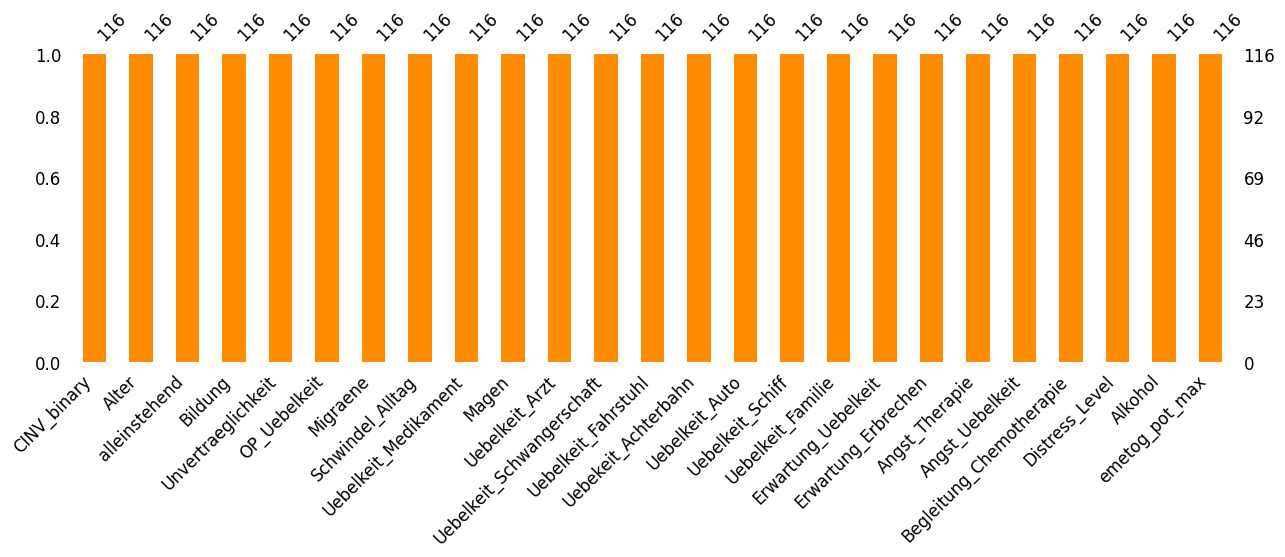

In [8]:
# Visualize missing values in the DataFrame using the 'missingno' library
# The 'msno.bar()' function generates a bar plot that shows the amount of missing data in each feature (column).
# This can help identify potential data quality issues or features that may require further processing.
msno.bar(emrisk, figsize=(15, 4), color="darkorange", fontsize=12, labels=True)

In [9]:
emrisk = emrisk.dropna()

There are no missing values in the data set which means we do not need to impute any data later on.

In [10]:
# Check for duplicate rows in the DataFrame and count them
# The 'duplicated()' method returns a boolean Series indicating whether each row is a duplicate of a previous row.
# By summing the boolean Series, we obtain the total number of duplicate rows in the DataFrame.
duplicate_count = emrisk.duplicated().sum()
print(f"The DataFrame contains {duplicate_count} duplicate rows.")

The DataFrame contains 0 duplicate rows.


In [11]:
# Loop through each column in the DataFrame 'emrisk'
for column in emrisk.columns:
    # Display the name of the current column
    print(f"Summary statistics for {column}:")
    
    # Calculate and display the frequency of each unique category in the current column using 'value_counts()'
    # The 'value_counts()' method returns a Series containing the counts of unique values in the column, sorted in descending order.
    # This provides an overview of how many times each unique category appears in the column.
    value_counts = emrisk[column].value_counts()
    print(value_counts)
    
    # Print a separator line of 40 dashes for readability
    # This separates the summary statistics of different columns and makes the output easier to read.
    print("-" * 40)

Summary statistics for CINV_binary:
CINV_binary
1    85
0    31
Name: count, dtype: int64
----------------------------------------
Summary statistics for Alter:
Alter
3    40
4    39
5    17
2    14
1     6
Name: count, dtype: int64
----------------------------------------
Summary statistics for alleinstehend:
alleinstehend
0    88
1    28
Name: count, dtype: int64
----------------------------------------
Summary statistics for Bildung:
Bildung
3    50
5    28
2    23
4    15
Name: count, dtype: int64
----------------------------------------
Summary statistics for Unvertraeglichkeit:
Unvertraeglichkeit
2    86
1    30
Name: count, dtype: int64
----------------------------------------
Summary statistics for OP_Uebelkeit:
OP_Uebelkeit
1    58
2    58
Name: count, dtype: int64
----------------------------------------
Summary statistics for Migraene:
Migraene
2    83
3    24
1     9
Name: count, dtype: int64
----------------------------------------
Summary statistics for Schwindel_Alltag:


### Summary/Interpretation

1. **CINV_binary**: This binary variable represents whether patients experienced chemotherapy-induced nausea and vomiting (CINV) or not. Most patients (85) experienced CINV, while a smaller number (31) did not.

2. **Alter**: This categorical variable represents the patient's age group. The data is fairly evenly distributed across different age groups, with groups 3 and 4 being the most frequent.

3. **alleinstehend**: This binary variable represents whether a patient lives alone or not. Most patients (88) do not live alone, while a smaller number (28) do.

4. **Bildung**: This categorical variable represents educational level. The most frequent categories are level 3 (50 patients) and level 5 (28 patients).

5. **Unvertraeglichkeit**: This binary variable represents whether patients experience intolerance. Most patients (86) do not experience intolerance, while a smaller number (30) do.

6. **OP_Uebelkeit**: This categorical variable represents nausea after surgery. The data is evenly split between the two categories (58 patients in each).

7. **Migraene**: This categorical variable indicates whether patients have experienced migraines. Most patients (83) do not have migraines, while a smaller number (33) do.

8. **Schwindel_Alltag**: This binary variable represents whether patients experience dizziness in everyday life. Most patients (65) do not experience dizziness, while a smaller number (51) do.

9. **Uebelkeit_Medikament**: This binary variable indicates whether patients experience nausea due to medication. Most patients (90) do not experience this, while a smaller number (26) do.

10. **Magen**: This binary variable indicates whether patients have stomach problems. Most patients (69) do not have stomach problems, while a smaller number (47) do.

11. **Uebelkeit_Arzt**: This binary variable indicates whether patients experience nausea when visiting a doctor. Most patients (98) do not experience this, while a smaller number (18) do.

12. **Uebelkeit_Schwangerschaft**: This binary variable indicates whether patients have experienced nausea during pregnancy. Most patients (69) have not, while a smaller number (47) have.

13. **Uebelkeit_Fahrstuhl**: This binary variable indicates whether patients experience nausea in elevators. Most patients (112) do not experience this, while a small number (4) do.

14. **Uebekeit_Achterbahn**: This binary variable indicate whether patients experience nausea on roller coasters. Most patients (71) do not experience this, while a smaller number (45) do.

15. **Uebelkeit_Auto**: This binary variable indicates whether patients experience nausea when riding in a car. Most patients (102) do not experience this, while a smaller number (14) do.

16. **Uebelkeit_Schiff**: This binary variable indicates whether patients experience nausea on ships. Most patients (84) do not experience this, while a smaller number (32) do.

17. **Uebelkeit_Familie**: This binary variable indicates whether patients have a family history of nausea. Most patients (101) do not have a family history, while a smaller number (15) do.

18. **Erwartung_Uebelkeit**: This categorical variable indicate patients' expectations of experiencing nausea. The distribution across the categories is relatively balanced, with the most frequent category being 3 (52 patients).

19. **Erwartung_Erbrechen**: This categorical variable indicates patients' expectations of experiencing vomiting. The distribution across the categories is relatively balanced, with the most frequent category being 3 (50 patients).

20. **Angst_Therapie**: This categorical variable represents patients' fear of therapy. The distribution across categories is fairly even, with categories 3 and 4 being the most common.

21. **Angst_Uebelkeit**: This categorical variable represents patients' fear of nausea. The distribution across categories is fairly balanced, with category 3 being the most frequent.

22. **Begleitung_Chemotherapie**: This categorical variable represents the type or presence of support during chemotherapy. Category 2 (60 patients) and 1 (44 patients) are the most common.

23. **Distress_Level**: This categorical variable represents patients' level of distress. The distribution is spread across different levels, with levels 9, 6, and 8 being the most frequent.

24. **Alkohol**: This categorical variable represents patients' alcohol consumption. The distribution is spread across various levels, with levels 2 and 1 being the most frequent.

25. **emetog_pot_max**: This categorical variable represents the maximal emetogenic potential of chemotherapy. Most patients are in levels 2 (67) and 1 (30).

Overall, the provided summary statistics show various distributions across the categorical features in the data, which may provide insights into the factors contributing to CINV and other related outcomes.

# 2. Data Preprocessing
[Back to Table of Contents](#table-of-contents)

The dataset itself is generally well-structured, without any missing values or abnormal features, making extensive preprocessing unnecessary. However, the outcome feature `CINV_binary` shows an imbalanced distribution, with a larger number of instances in one class compared to the other. This imbalance can cause the model to favour predicting the majority class, resulting in reduced performance when identifying the minority class. Accurate prediction of both classes is essential for determining key predictors of chemotherapy-induced nausea and vomiting (CINV) and guiding potential therapeutic interventions. Therefore, after conducting exploratory data analysis (EDA), we will perform oversampling of the outcome feature to counteract the imbalance. This approach aims to enhance the model's accuracy and fairness in predicting both classes and may ultimately improve overall model performance.

# 3. Exploratory Data Analysis
[Back to Table of Contents](#table-of-contents)

In the Exploratory Data Analysis (EDA), the focus will be on examining the data distribution, investigating the correlation among features, and exploring the connection between the features and the target variable. It will commence by scrutinizing the data distribution, and subsequently, It will delve into the relationship between the target and the independent variables.

In [12]:
# Define the number of rows and columns for the subplots
num_rows = 6
num_cols = 4

# Count the number of unique values for each column
unique_counts = emrisk.nunique()

# Determine which features are categorical (including dichotomous) and one numerical variable 'Distress_Level'
categorical_features = unique_counts[unique_counts <= 20].index.tolist()
categorical_features.remove('Distress_Level')

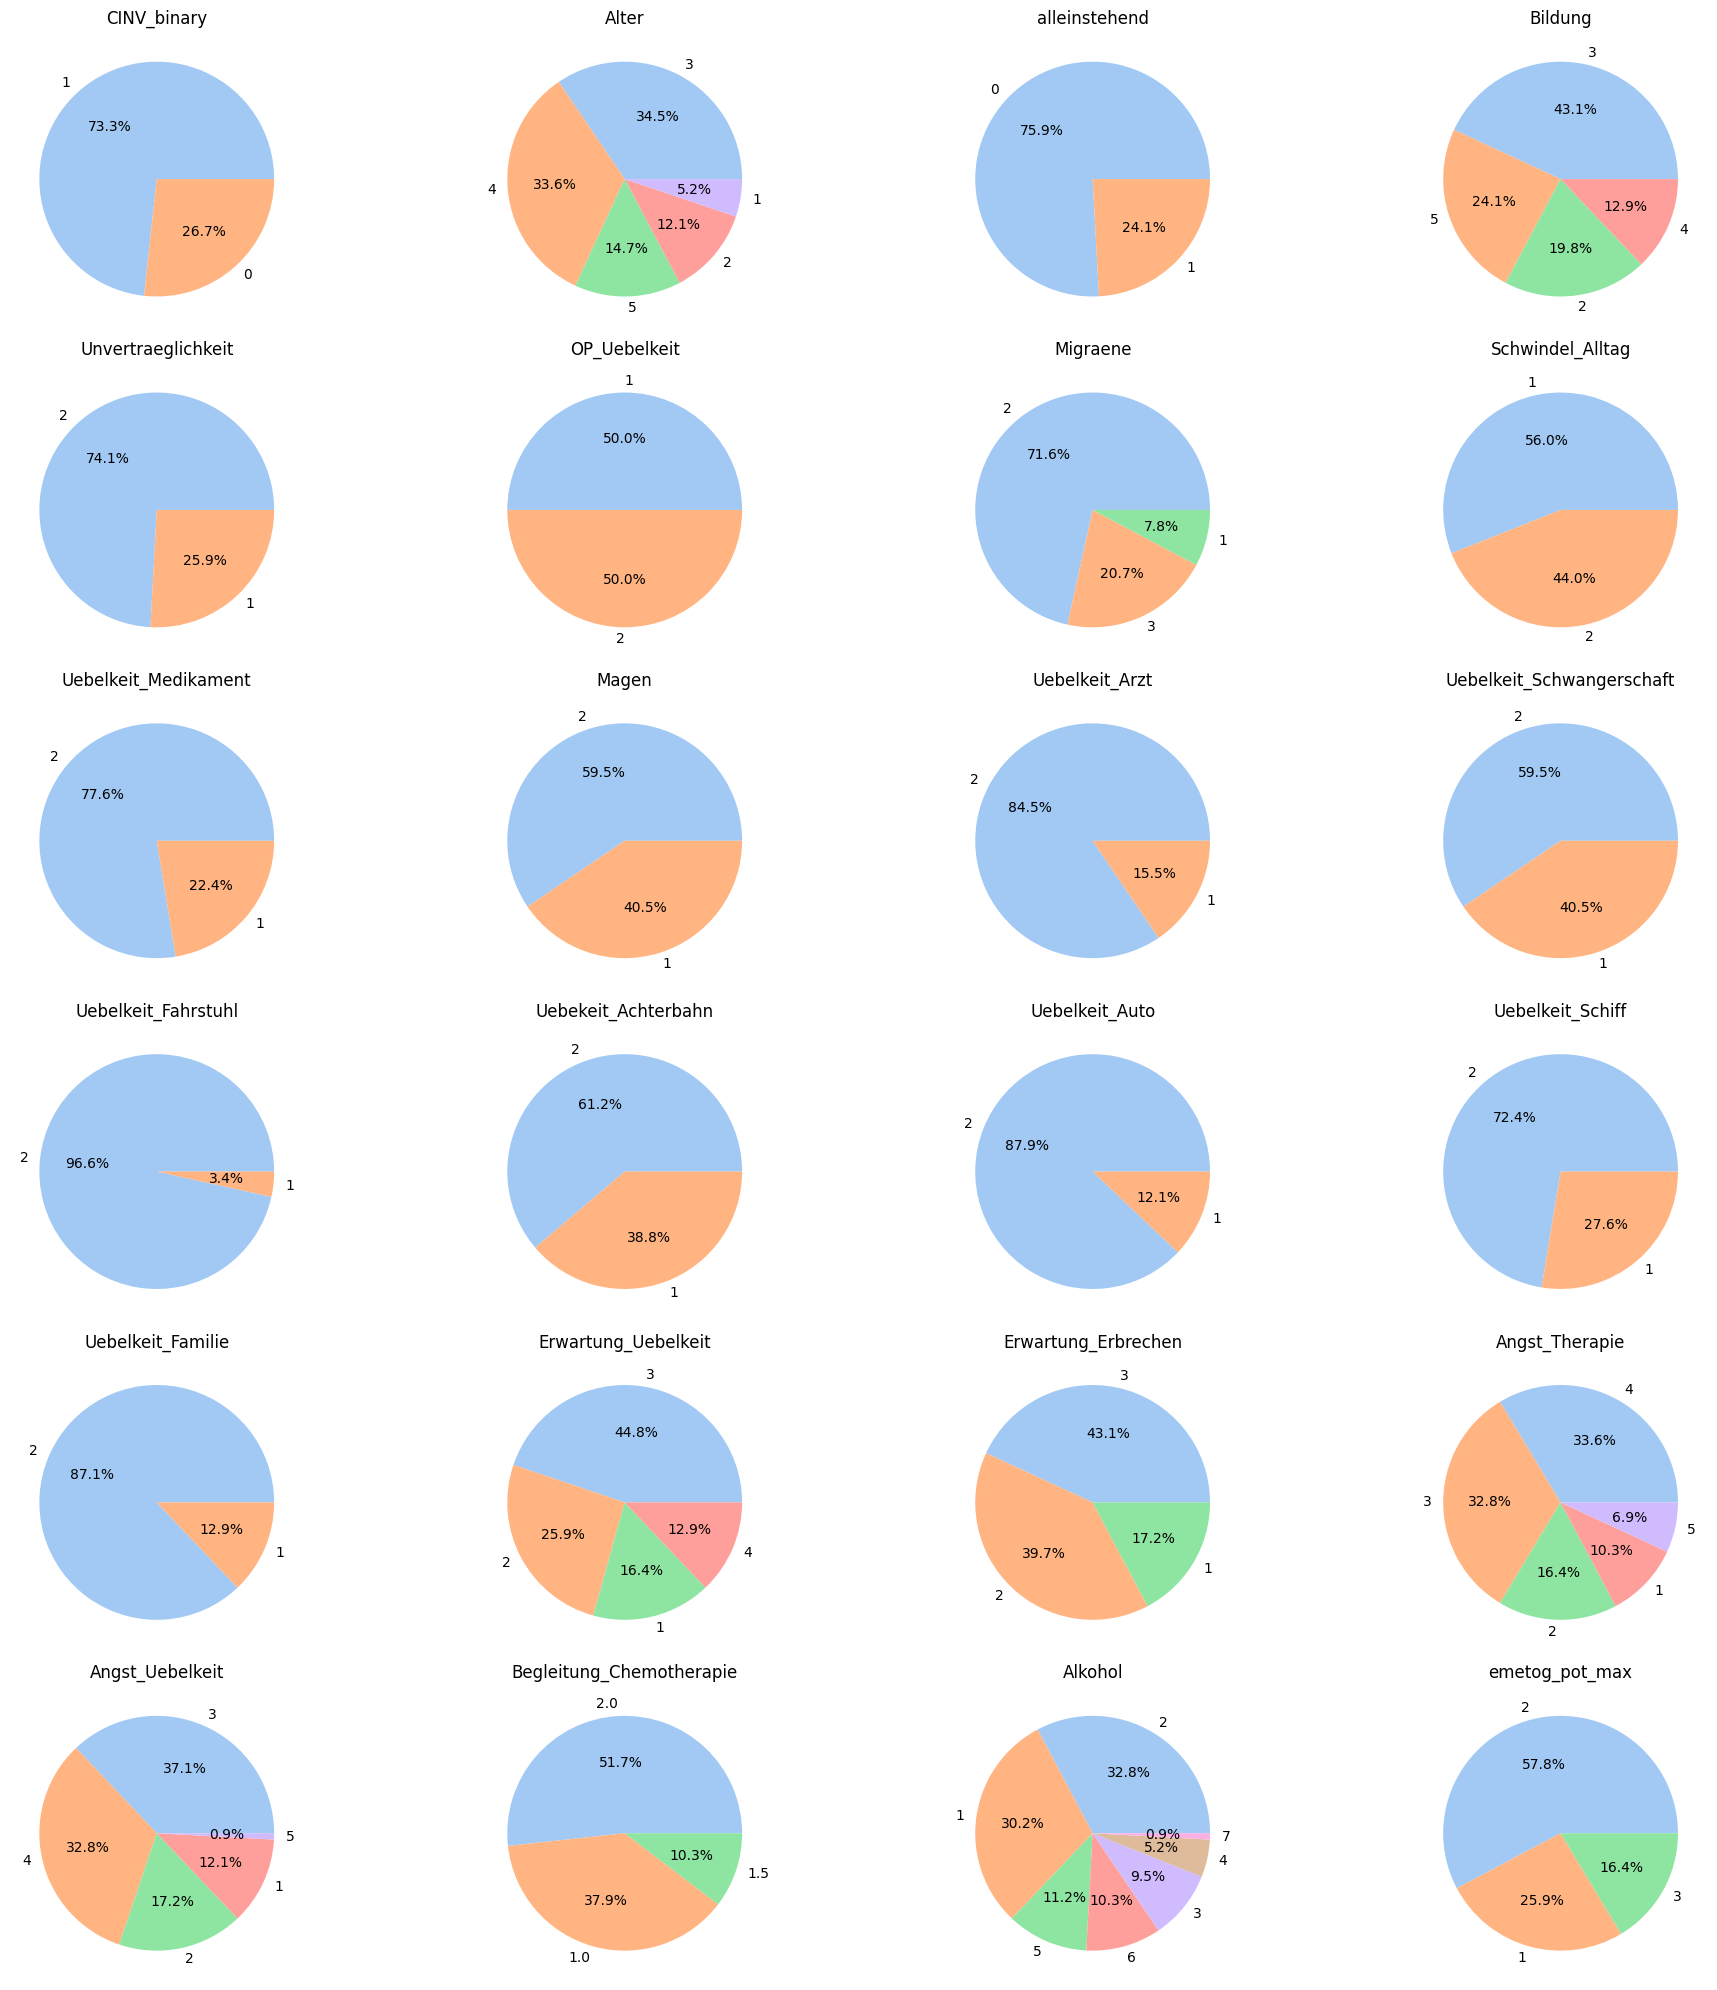

In [13]:
# Create a grid of subplots for pie charts
num_pie_rows = (len(categorical_features) + num_cols - 1) // num_cols
fig_pie, axes_pie = plt.subplots(num_pie_rows, num_cols, figsize=(20, 20))

# Loop through each categorical feature and plot a pie chart
for i, column in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    # Plot pie chart for the current categorical feature
    emrisk[column].value_counts().plot.pie(ax=axes_pie[row, col], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    # Set the title of the pie chart as the feature name
    axes_pie[row, col].set_title(column)
    # Hide the y-axis to keep the plot clean and focused on the pie chart
    axes_pie[row, col].set_ylabel('')

# Adjust layout to prevent overlap of plots and display the pie charts
plt.tight_layout()
plt.show()

Based on the pie chart visualizations of the categorical data, we observe that the distributions across the various features reflect the actual responses from the surveyed population, resulting in naturally uneven class distributions for different features. This suggests that the imbalances observed in these features are genuine and representative of the underlying population.

However, the pie chart of the outcome feature `CINV_binary` clearly exhibits the earlier mentioned imbalance. This reinforces the necessity of implementing a rebalancing technique to address the skewed distribution of the outcome feature. Properly balancing the classes in `CINV_binary` will be essential to improve model performance and ensure fair representation of both classes in the predictive modeling process.

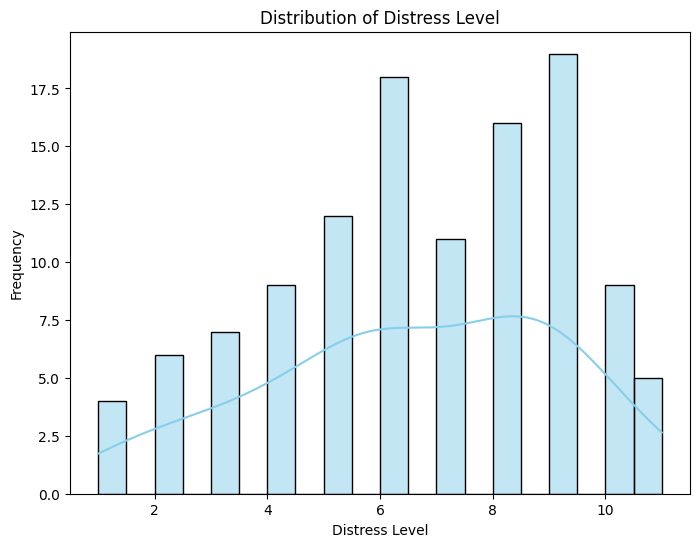

In [14]:
# Create a histogram for the 'Distress_Level' feature
plt.figure(figsize=(8, 6))
sns.histplot(emrisk['Distress_Level'], kde=True, bins=20, color='skyblue')
plt.xlabel('Distress Level')
plt.ylabel('Frequency')
plt.title('Distribution of Distress Level')
plt.show()

Regarding the feature `Distress_Level`, the creation of the question in the original questionnaire assumes a numeric feature thus a histogram is shown. The distribution is observed to be bimodal, which aligns with numbers from descriptive statistics. This suggests the presence of two distinct groups within the data, most probably corresponding to different levels of distress experienced by the respondents. Both modi are >6 points showing a rather high distress level in participants.

In [15]:
# Define the categorical features and the target variable
categorical_features = emrisk.columns.tolist()
target_variable = 'CINV_binary'

# Remove the target variable from the list of categorical features to exclude cross-tabulation with itself
categorical_features.remove(target_variable)

In [16]:
# Iterate through each categorical feature
for feature in categorical_features:
    # Create a cross-tabulation between the categorical feature and the target variable
    cross_tab = pd.crosstab(emrisk[feature], emrisk[target_variable])

    # Display the cross-tabulation
    print(f"Cross-tabulation of {feature} with {target_variable}:")
    print(cross_tab)

    # Calculate the proportions within each category
    proportions = cross_tab.div(cross_tab.sum(axis=1), axis=0)

    # Round the proportions to two decimal places
    proportions = proportions.round(2)

    # Display the rounded proportions for each category of the feature
    print(f"\nProportions of {feature} with {target_variable} (rounded to 2 decimal places):")
    print(proportions)

    # Print a separator for readability between different features' cross-tabulations
    print("-" * 40)

Cross-tabulation of Alter with CINV_binary:
CINV_binary   0   1
Alter              
1             0   6
2             5   9
3             8  32
4            14  25
5             4  13

Proportions of Alter with CINV_binary (rounded to 2 decimal places):
CINV_binary     0     1
Alter                  
1            0.00  1.00
2            0.36  0.64
3            0.20  0.80
4            0.36  0.64
5            0.24  0.76
----------------------------------------
Cross-tabulation of alleinstehend with CINV_binary:
CINV_binary     0   1
alleinstehend        
0              23  65
1               8  20

Proportions of alleinstehend with CINV_binary (rounded to 2 decimal places):
CINV_binary       0     1
alleinstehend            
0              0.26  0.74
1              0.29  0.71
----------------------------------------
Cross-tabulation of Bildung with CINV_binary:
CINV_binary   0   1
Bildung            
2             5  18
3            11  39
4             7   8
5             8  20

Proport

The cross-tabulations and proportions of the categorical features with the target feature `CINV_binary` show that many features, such as `Alter`, `alleinstehend`, `Bildung`, and `Uebelkeit_Medikament`, have a higher proportion of the `CINV_binary` class 1 (indicating a positive case of chemotherapy-induced nausea and vomiting) across most categories. This demonstrates the actual imbalance present in the dataset. Therefore, rebalancing the data, with a focus on `CINV_binary`, is likely to balance the observed data more evenly.

In [17]:
# Calculate Spearman correlation
# Spearman correlation measures the strength and direction of the monotonic relationship
# between pairs of continuous or ordinal variables.
corr = emrisk.corr(method='spearman')

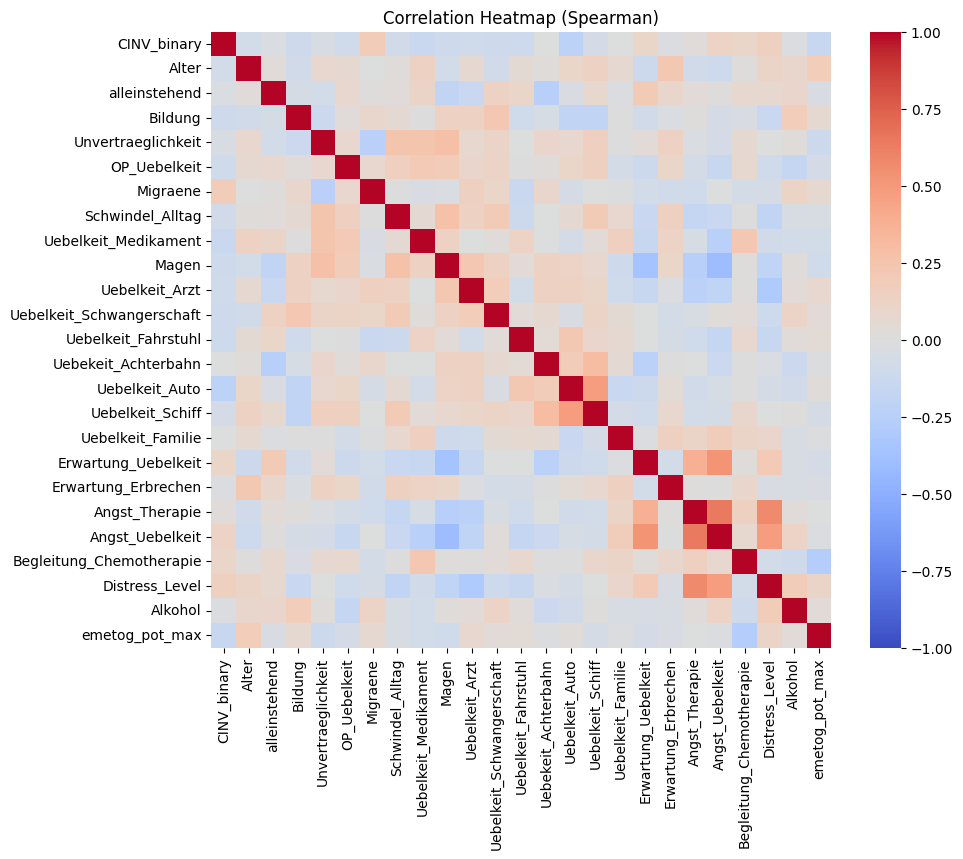

In [74]:
# Correlation heatmap
# Create a heatmap of the filtered correlation matrix using seaborn's heatmap function.
# The heatmap displays the strength of the correlations visually.
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cbar=True
)
plt.title('Correlation Heatmap (Spearman)')

# save the figure as EPS
plt.savefig('corr_heatmap.eps', format='eps')

# show the plot
plt.show()

In [19]:
# Define the correlation threshold for strong correlations
threshold = 0.3

# Identify pairs of features with absolute correlation coefficients above the defined threshold
# Exclude correlations with 1.0 (same feature correlations)
strong_correlations = corr[
    (corr.abs() > threshold) & (corr != 1)
].stack().reset_index()

# Rename the columns for clarity
strong_correlations.columns = ['Feature1', 'Feature2', 'Correlation']

# Display the strong correlations dataframe
strong_correlations

,Feature1,Feature2,Correlation
0,Magen,Erwartung_Uebelkeit,-0.363502
1,Magen,Angst_Uebelkeit,-0.407456
2,Uebekeit_Achterbahn,Uebelkeit_Schiff,0.300284
3,Uebelkeit_Auto,Uebelkeit_Schiff,0.481829
4,Uebelkeit_Schiff,Uebekeit_Achterbahn,0.300284
5,Uebelkeit_Schiff,Uebelkeit_Auto,0.481829
6,Erwartung_Uebelkeit,Magen,-0.363502
7,Erwartung_Uebelkeit,Angst_Therapie,0.381320
8,Erwartung_Uebelkeit,Angst_Uebelkeit,0.525863
9,Angst_Therapie,Erwartung_Uebelkeit,0.381320


In [20]:
# Calculate the Variance Inflation Factor (VIF) for each feature in the DataFrame
def calculate_vif(df):
    # Add a constant column for the intercept
    X = pd.DataFrame(np.ones(df.shape[0]), columns=['Intercept'])
    X = pd.concat([X, df], axis=1)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data

In [21]:
# VIF vor Feature Engineering
vif_before = calculate_vif(emrisk.drop(columns='CINV_binary'))
print("VIF before Feature Engineering:")
print(vif_before)

VIF before Feature Engineering:
                      Feature         VIF
0                   Intercept  363.256446
1                       Alter    1.259040
2               alleinstehend    1.368172
3                     Bildung    1.295989
4          Unvertraeglichkeit    1.457506
5                OP_Uebelkeit    1.211369
6                    Migraene    1.205913
7            Schwindel_Alltag    1.341917
8        Uebelkeit_Medikament    1.404263
9                       Magen    1.680453
10             Uebelkeit_Arzt    1.314287
11  Uebelkeit_Schwangerschaft    1.300687
12        Uebelkeit_Fahrstuhl    1.323762
13        Uebekeit_Achterbahn    1.371694
14             Uebelkeit_Auto    1.569239
15           Uebelkeit_Schiff    1.614338
16          Uebelkeit_Familie    1.263722
17        Erwartung_Uebelkeit    1.866976
18        Erwartung_Erbrechen    1.233346
19             Angst_Therapie    2.457320
20            Angst_Uebelkeit    2.951275
21   Begleitung_Chemotherapie    1.269353
22

Angst_Therapie und Angst_Uebelkeit kombinieren:

rho = 0.646406
Diese beiden Variablen haben eine hohe Korrelation. Du hast bereits eine kombinierte Variable Combined_Anxiety erstellt.


Angst_Therapie und Distress_Level kombinieren:

rho = 0.574713
Auch diese beiden Variablen sind stark korreliert. Wir könnten diese ebenfalls zu einer neuen kombinierten Variable Combined_Distress_Anxiety zusammenfassen.


Erwartung_Uebelkeit und Angst_Uebelkeit kombinieren:

rho = 0.525863
Diese beiden Variablen haben ebenfalls eine hohe Korrelation und sollten zu einer neuen Variable Combined_Expectation_Anxiety zusammengefasst werden.

### Recommendations for Feature Selection and Engineering:
Feature combination 

# 4. Feature Selection/Engineering
[Back to Table of Contents](#table-of-contents)

# 5. Model Selection and Training Overview
[Back to Table of Contents](#table-of-contents)

In the process of selecting and training models, we consider the dataset's characteristics, particularly the presence of various features and potential correlations. This approach will guide the preparation of the features, including handling multicollinearity, feature selection, and transformation as necessary. The following tasks outline the feature transformation and model selection pipeline for our data:

| Task                              | Features                                          | Pipeline                   |
|-----------------------------------|---------------------------------------------------|----------------------------|
| Feature Engineering               | Combining and transforming features for optimal model input.|                            |
| Feature Encoding                  | Label encoding categorical features due to the use of tree-based algorithms. |                            |
| Feature Scaling                   | Standardise features to improve model performance.|                            |
| Oversampling                      | Addressing the imbalanced outcome feature `CINV_binary`.|                     |
|                                   |                                                   |                              |
| Training Pipeline                 | All available features.                            | Implement chosen tree-based classification algorithm. |
|                                   |                                                   |                            |
| Evaluation Metrics                |                                                   | Utilise classification metrics (accuracy, precision, recall, F1-score) for model assessment. |
|                                   |                                                   | Perform cross-validation for robust evaluation of model performance.



### Split in training and test data

In [22]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE

In [23]:
# Define the features (X) and target (y) variables from the dataframe
X = emrisk.drop('CINV_binary', axis=1)
y = emrisk['CINV_binary']

# Split the data into training and test sets with stratification based on the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [24]:
# Instantiate the SMOTE class
smote = SMOTE(random_state=42)

In [25]:
# Apply SMOTE to the training set to oversample the minority class
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [26]:
# Display the shape of the original and oversampled training sets
print("Original training set shape:", X_train.shape)
print("Oversampled training set shape:", X_train_oversampled.shape)

Original training set shape: (81, 24)
Oversampled training set shape: (118, 24)


### The ML-Models

In [27]:
# Define a ColumnTransformer 
tree_transformer = ColumnTransformer([
    ("ordinal", OrdinalEncoder(), X.select_dtypes(include='object').columns)
], remainder="passthrough")

In [28]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
# Define the pipelines for different models
# Decision Tree
dt_pipeline = Pipeline([
    ("preprocessor", tree_transformer),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Random Forest
rf_pipeline = Pipeline([
    ("preprocessor", tree_transformer),
    ("classifier", RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
])

# XGBoost
xgb_pipeline = Pipeline([
    ("preprocessor", tree_transformer),
    ("classifier", XGBClassifier(n_estimators=100, max_depth=5, random_state=42))
])

# SVM Pipeline
svm_pipeline = Pipeline([
    ("preprocessor", tree_transformer),
    ("classifier", SVC(probability=True, random_state=42))
])


# Gradient Boosting Machine Pipeline
gbm_pipeline = Pipeline([
    ("preprocessor", tree_transformer),
    ("classifier", GradientBoostingClassifier(random_state=42))
])


In [30]:
# Train and evaluate each pipeline
pipelines = {
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline,
    "XGBoost": xgb_pipeline,
    "SVM": svm_pipeline,
    "Gradient Boosting Machine": gbm_pipeline
}

In [31]:
# Iterate through each pipeline, train it on the oversampled training data, and evaluate its performance on the test data
for name, pipeline in pipelines.items():
    # Train the pipeline
    pipeline.fit(X_train_oversampled, y_train_oversampled)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Output the performance metrics
    print(f"\n{name}:")
    print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
    print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
    print("F1-score: {:.2f}".format(f1_score(y_test, y_pred)))


Decision Tree:
Accuracy: 0.69
Precision: 0.78
Recall: 0.81
F1-score: 0.79

Random Forest:
Accuracy: 0.54
Precision: 0.73
Recall: 0.62
F1-score: 0.67

XGBoost:
Accuracy: 0.63
Precision: 0.76
Recall: 0.73
F1-score: 0.75

SVM:
Accuracy: 0.60
Precision: 0.77
Recall: 0.65
F1-score: 0.71

Gradient Boosting Machine:
Accuracy: 0.63
Precision: 0.76
Recall: 0.73
F1-score: 0.75


### Hyperparameter search: Decision tree

In [32]:
# Now pipeline_params dictionary contains the parameters of each pipeline
dt_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinal', OrdinalEncoder(),
                                    Index([], dtype='object'))])),
  ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))],
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinal', OrdinalEncoder(),
                                  Index([], dtype='object'))]),
 'classifier': DecisionTreeClassifier(max_depth=5, random_state=42),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'passthrough',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__transformer_weights': None,
 'preprocessor__transformers': [('ordinal',
   OrdinalEncoder(),
   Index([], dtype='object'))],
 'preprocessor__verbose': False,
 'preprocessor__verbose_feature_names_out': True,
 'preprocessor__ordinal': OrdinalEncoder(),
 'preprocessor__ordinal__categories': 'auto',
 

In [33]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_decision_tree = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15, 20, 25],
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 4, 6],
    'classifier__max_features': ['sqrt', 'log2', None],
}

In [34]:
# Create a GridSearchCV object with the Decision Tree pipeline, hyperparameter grid,
# stratified k-fold cross-validation, and parallelization using 1 CPU core
grid_search_decision_tree = GridSearchCV(
    dt_pipeline,
    param_grid=param_dist_decision_tree,
    cv=StratifiedKFold(n_splits=10),
    n_jobs=-1,
    verbose=1
)

# Fit the model using the grid search
grid_search_decision_tree.fit(X_train_oversampled, y_train_oversampled)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         Index([], dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier(max_depth=5,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 5, 10, 15, 20, 25],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_leaf': [1, 2, 4, 6],
                         'classifier__min_samples_split': [2, 5, 10, 15]},
             verbose=1)

In [35]:
# Output the best parameters found by the grid search
print("Best Parameters for Decision Tree:", grid_search_decision_tree.best_params_)

Best Parameters for Decision Tree: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}


### Hyperparameter search: Random Forest

In [36]:
# Retrieve the current parameters of the Random Forest pipeline
rf_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinal', OrdinalEncoder(),
                                    Index([], dtype='object'))])),
  ('classifier', RandomForestClassifier(max_depth=5, random_state=42))],
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinal', OrdinalEncoder(),
                                  Index([], dtype='object'))]),
 'classifier': RandomForestClassifier(max_depth=5, random_state=42),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'passthrough',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__transformer_weights': None,
 'preprocessor__transformers': [('ordinal',
   OrdinalEncoder(),
   Index([], dtype='object'))],
 'preprocessor__verbose': False,
 'preprocessor__verbose_feature_names_out': True,
 'preprocessor__ordinal': OrdinalEncoder(),
 'preprocessor__ordinal__categories': 'auto',
 

In [37]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_random_forest = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 4, 6],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [True, False],
}

In [38]:
# Create a GridSearchCV object with the Random Forest pipeline, hyperparameter grid,
# stratified k-fold cross-validation, and parallelization using 1 CPU core
grid_search_random_forest = GridSearchCV(
    rf_pipeline,
    param_grid=param_dist_random_forest,
    cv=StratifiedKFold(n_splits=10),
    n_jobs=-1,
    verbose=1
)

# Fit the model using the grid search
grid_search_random_forest.fit(X_train_oversampled, y_train_oversampled)

Fitting 10 folds for each of 2560 candidates, totalling 25600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         Index([], dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(max_depth=5,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 5, 10, 15, 20],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4, 6],
                         'classifier__min_samples_split': [2, 5, 10, 15],
                         'classifier__n_estimators': [100, 200, 300, 400]},
             verbose=1)

In [39]:
# Output the best parameters found by the grid search
print("Best Parameters for Random Forest:", grid_search_random_forest.best_params_)

Best Parameters for Random Forest: {'classifier__bootstrap': True, 'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


### Hyperparameter search: XGBoost

In [40]:
# Retrieve the current parameters of the Random Forest pipeline
xgb_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinal', OrdinalEncoder(),
                                    Index([], dtype='object'))])),
  ('classifier',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=5, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 multi_strategy=None, n_estimators=100, n_jobs=None,
                 num_parallel_tree=Non

In [41]:
# Define a dictionary of hyperparameter distributions for a randomized search
param_dist_xgboost = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__gamma': [0, 0.1, 0.2, 0.3],
    'classifier__reg_alpha': [0, 0.001, 0.01, 0.1],
    'classifier__reg_lambda': [0, 0.001, 0.01, 0.1]
}

In [42]:
# Create a GridSearchCV object with the XGBoost pipeline, hyperparameter grid,
# stratified k-fold cross-validation, and parallelization using 1 CPU core
grid_search_xgboost = GridSearchCV(
    xgb_pipeline,
    param_grid=param_dist_xgboost,
    cv=StratifiedKFold(n_splits=10),
    n_jobs=-1,
    verbose=1
)

# Fit the model using the grid search
grid_search_xgboost.fit(X_train_oversampled, y_train_oversampled)

Fitting 10 folds for each of 36864 candidates, totalling 368640 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         Index([], dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      c...
             param_grid={'classifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'classifier__gamma': [0, 0.1, 0.2, 0.3],
                         'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7, 10],
                         'classifier__n_estimators': [100, 200, 300, 500],
                         'classifier__reg_alpha': [0, 0.001, 0.01, 0.1],
                         'classifier__reg_lambda': [0, 0.001, 0.01, 0.1],
                         'classifier__subsample': [0.6, 0.8, 1.0]},
             verbose=1)

In [43]:
# Output the best parameters found by the grid search
print("Best Parameters for XGBoost:", grid_search_xgboost.best_params_)

Best Parameters for XGBoost: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 500, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 0.01, 'classifier__subsample': 0.8}


### Hyperparameter search: SVM

In [44]:
# Retrieve the current parameters of the SVM pipeline
svm_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinal', OrdinalEncoder(),
                                    Index([], dtype='object'))])),
  ('classifier', SVC(probability=True, random_state=42))],
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinal', OrdinalEncoder(),
                                  Index([], dtype='object'))]),
 'classifier': SVC(probability=True, random_state=42),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'passthrough',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__transformer_weights': None,
 'preprocessor__transformers': [('ordinal',
   OrdinalEncoder(),
   Index([], dtype='object'))],
 'preprocessor__verbose': False,
 'preprocessor__verbose_feature_names_out': True,
 'preprocessor__ordinal': OrdinalEncoder(),
 'preprocessor__ordinal__categories': 'auto',
 'preprocessor__ordinal__dtyp

In [45]:
# GridSearchCV für SVM
param_dist_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [46]:
# 
grid_search_svm = GridSearchCV(
    svm_pipeline,
    param_grid=param_dist_svm,
    cv=StratifiedKFold(n_splits=10),
    n_jobs=-1,
    verbose=1
)

# Fit the model using the grid search
grid_search_svm.fit(X_train_oversampled, y_train_oversampled)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         Index([], dtype='object'))])),
                                       ('classifier',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': [1, 0.1, 0.01, 0.001],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']},
             verbose=1)

In [47]:
# Output the best parameters found by the grid search
print("Best Parameters for SVM:", grid_search_svm.best_params_)

Best Parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}


### Hyperparameter search: Gradient Boosting Machine

In [48]:
# Retrieve the current parameters of the GBM pipeline
gbm_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinal', OrdinalEncoder(),
                                    Index([], dtype='object'))])),
  ('classifier', GradientBoostingClassifier(random_state=42))],
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinal', OrdinalEncoder(),
                                  Index([], dtype='object'))]),
 'classifier': GradientBoostingClassifier(random_state=42),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'passthrough',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__transformer_weights': None,
 'preprocessor__transformers': [('ordinal',
   OrdinalEncoder(),
   Index([], dtype='object'))],
 'preprocessor__verbose': False,
 'preprocessor__verbose_feature_names_out': True,
 'preprocessor__ordinal': OrdinalEncoder(),
 'preprocessor__ordinal__categories': 'auto',
 'preprocessor__ord

In [49]:
# GridSearchCV für GBM
param_dist_gbm = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [50]:
# 
grid_search_gbm = GridSearchCV(
    gbm_pipeline,
    param_grid=param_dist_gbm,
    cv=StratifiedKFold(n_splits=10),
    n_jobs=-1,
    verbose=1
)

# Fit the model using the grid search
grid_search_gbm.fit(X_train_oversampled, y_train_oversampled)


Fitting 10 folds for each of 1296 candidates, totalling 12960 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         Index([], dtype='object'))])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7, 10],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300],
                         'classifier__subsample': [0.6, 0.8, 1.0]},
             verbose=1)

In [51]:
# Output the best parameters found by the grid search
print("Best Parameters for Gradient Boosting:", grid_search_gbm.best_params_)

Best Parameters for Gradient Boosting: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}


# 6. Model Evaluation
[Back to Table of Contents](#table-of-contents)

In [52]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV

# Comparison model with Dario's analysis
# Stepwise Regression
X_train_const = add_constant(X_train_oversampled)
stepwise_model = sm.Logit(y_train_oversampled, X_train_const).fit(method='newton')

X_test_const = add_constant(X_test)
stepwise_preds = stepwise_model.predict(X_test_const)
stepwise_preds_proba = stepwise_preds
stepwise_preds_binary = [1 if x > 0.5 else 0 for x in stepwise_preds]

# LASSO Regression
lasso_model = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=10000, random_state=42)
lasso_model.fit(X_train_oversampled, y_train_oversampled)
lasso_preds = lasso_model.predict(X_test)
lasso_preds_proba = lasso_model.predict_proba(X_test)[:, 1]

# Compromise Model
selected_features = ['Bildung', 'Uebelkeit_Medikament', 'Uebelkeit_Auto', 'Distress_Level', 'Angst_Uebelkeit',
                     'Angst_Therapie', 'emetog_pot_max']
compromise_model = sm.Logit(y_train_oversampled, add_constant(X_train_oversampled[selected_features])).fit(method='newton', maxiter=1000)
compromise_preds = compromise_model.predict(add_constant(X_test[selected_features]))
compromise_preds_proba = compromise_preds
compromise_preds_binary = [1 if x > 0.5 else 0 for x in compromise_preds]

         Current function value: 0.401190
         Iterations: 35


/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.601777
         Iterations: 1000


/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
# Define pipelines dictionary including dummy models
pipelines = {
    "Stepwise Regression": stepwise_model,
    "LASSO Regression": lasso_model,
    "Compromise Model": compromise_model,
    "Decision Tree": grid_search_decision_tree,
    "Random Forest": grid_search_random_forest,
    "XGBoost": grid_search_xgboost,
    "SVM": grid_search_svm,
    "Gradient Boosting Machine": grid_search_gbm
}

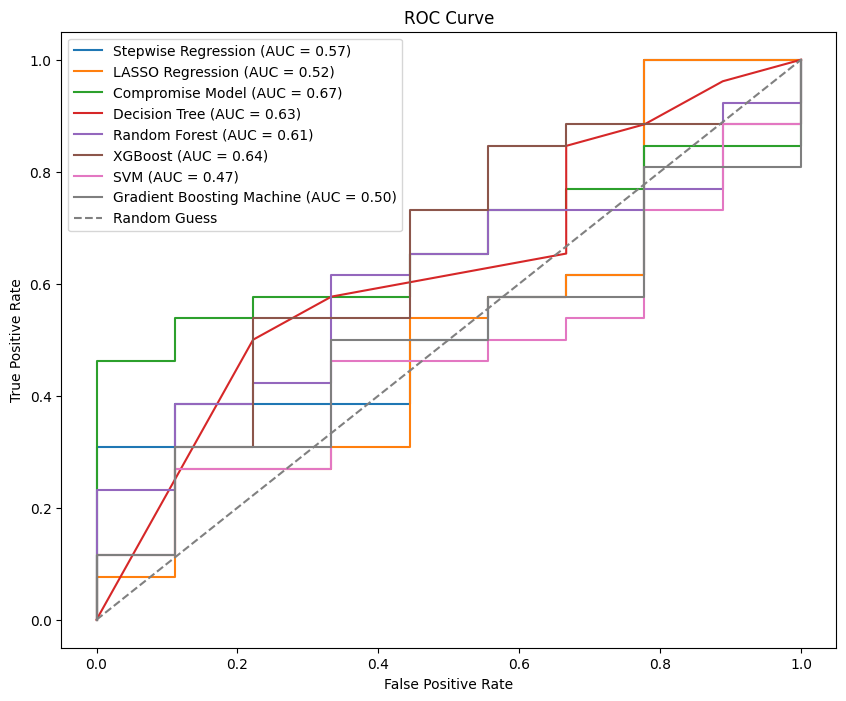

In [54]:
# ROC-Kurven und AUC-Werte berechnen
plt.figure(figsize=(10, 8))

for name, model in pipelines.items():
    if name == "Stepwise Regression":
        y_pred_proba = model.predict(add_constant(X_test))
    elif name == "Compromise Model":
        y_pred_proba = model.predict(add_constant(X_test[selected_features]))
    elif name == "LASSO Regression":
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.best_estimator_.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [55]:
# function to calculate sensitivity at threshold
# Berechnung der Sensitivität, Spezifität, PPV und NPV
def evaluate_at_sensitivity_threshold(model, X_test, y_test, threshold=0.8):
    if model in [stepwise_model, compromise_model]:
        if model == stepwise_model:
            y_pred_proba = model.predict(add_constant(X_test))
        else:
            y_pred_proba = model.predict(add_constant(X_test[selected_features]))
    elif model == lasso_model:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.best_estimator_.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Find the threshold for the given sensitivity
    sens_index = np.where(tpr >= threshold)[0][0]
    optimal_threshold = thresholds[sens_index]
    
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    npv = precision_score(y_test, y_pred, pos_label=0)
    
    return round(accuracy, 3), round(precision, 3), round(recall, 3), round(f1, 3), round(specificity, 3), round(npv, 3), round(optimal_threshold, 3)


In [56]:
# Evaluate all models
eval_metrics = {}
for name, model in pipelines.items():
    accuracy, precision, recall, f1, specificity, npv, opt_threshold = evaluate_at_sensitivity_threshold(model, X_test, y_test)
    eval_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall/Sensitivity': recall,
        'F1-Score': f1,
        'Specificity': specificity,
        'Negative predicted value': npv,
        'Optimal Threshold': opt_threshold
    }

# Display evaluation metrics
eval_df = pd.DataFrame(eval_metrics).T
print(eval_df)

                           Accuracy  Precision  Recall/Sensitivity  F1-Score   
Stepwise Regression           0.800      0.788               1.000     0.881  \
LASSO Regression              0.800      0.788               1.000     0.881   
Compromise Model              0.686      0.759               0.846     0.800   
Decision Tree                 0.714      0.786               0.846     0.815   
Random Forest                 0.714      0.750               0.923     0.828   
XGBoost                       0.743      0.815               0.846     0.830   
SVM                           0.686      0.742               0.885     0.807   
Gradient Boosting Machine     0.657      0.750               0.808     0.778   

                           Specificity  Negative predicted value   
Stepwise Regression              0.222                     1.000  \
LASSO Regression                 0.222                     1.000   
Compromise Model                 0.222                     0.333   
Decisio

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Funktion zur Darstellung der Konfusionsmatrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

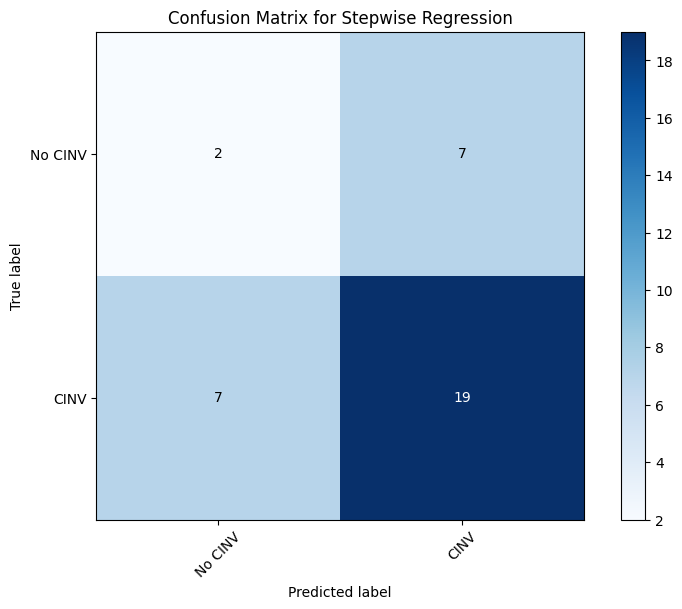

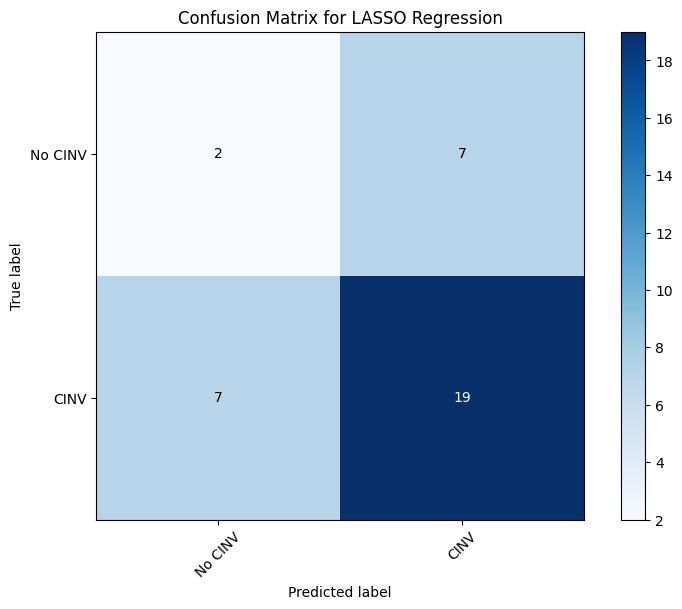

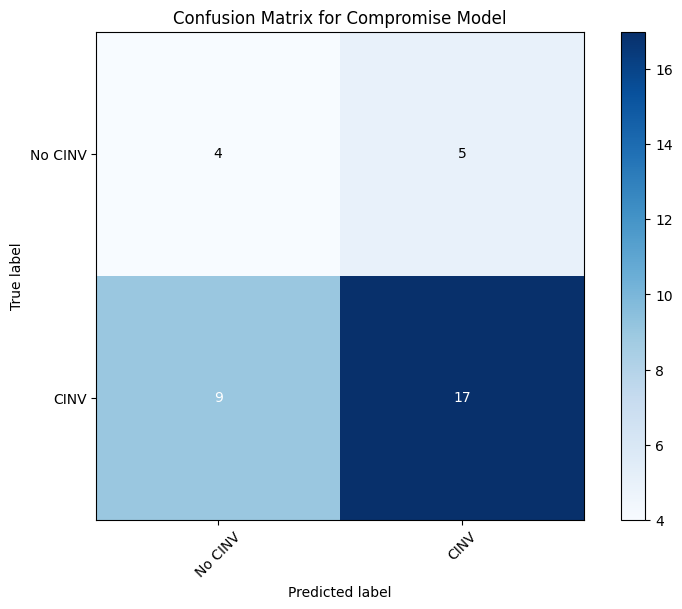

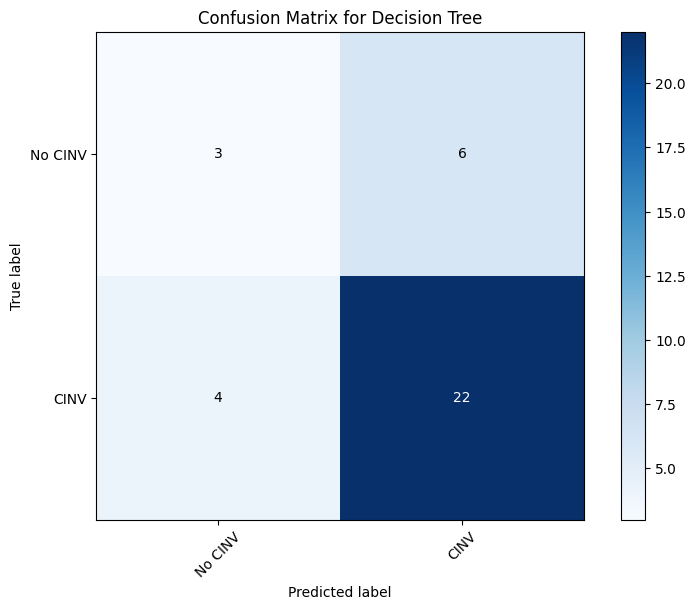

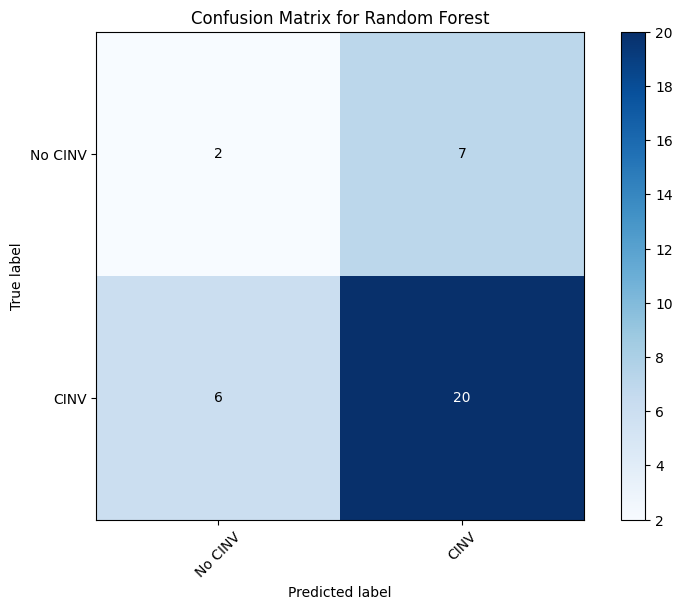

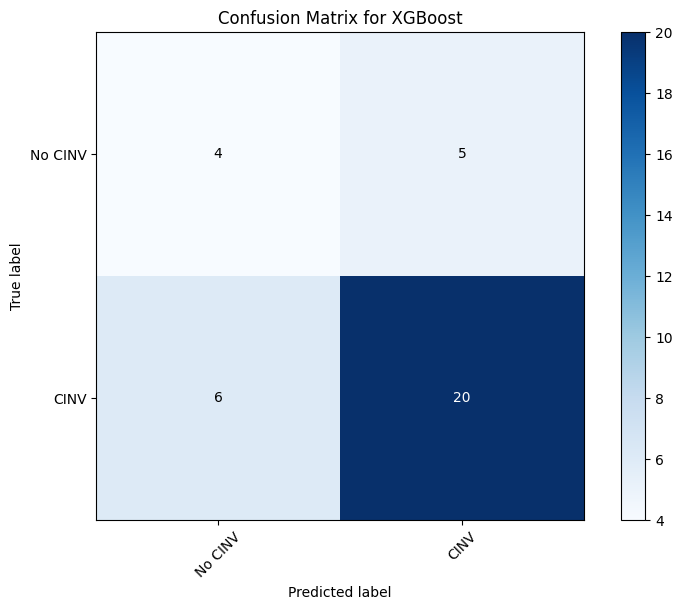

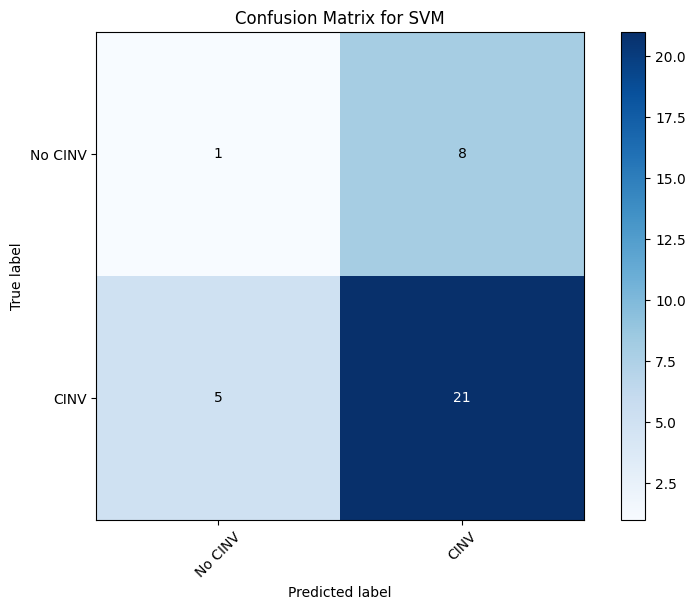

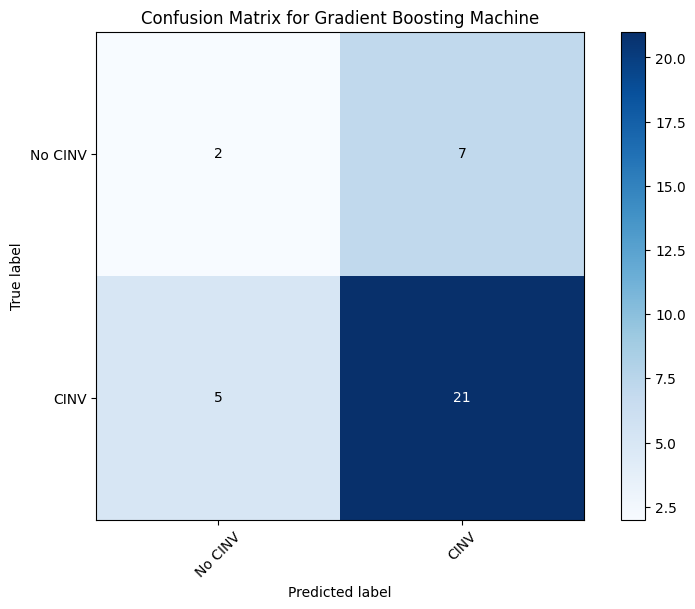

In [58]:
# Berechne und plotte die Konfusionsmatrix für jedes Modell
for name, model in pipelines.items():
    if name == "Stepwise Regression":
        y_pred = (stepwise_model.predict(add_constant(X_test)) > 0.5).astype(int)
    elif name == "Compromise Model":
        y_pred = (compromise_model.predict(add_constant(X_test[selected_features])) > 0.5).astype(int)
    elif name == "LASSO Regression":
        y_pred = lasso_model.predict(X_test)
    else:
        y_pred = model.best_estimator_.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['No CINV', 'CINV'], title=f'Confusion Matrix for {name}')


In [59]:
# function to bootstrap metrics
from sklearn.utils import resample

def bootstrap_metrics(model, X_test, y_test, n_bootstraps=10000):
    boot_metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall/Sensitivity': [],
        'F1-Score': [],
        'Specificity': [],
        'NPV': []
    }
    
    for _ in range(n_bootstraps):
        X_resampled, y_resampled = resample(X_test, y_test, random_state=42)
        accuracy, precision, recall, f1, specificity, npv, _ = evaluate_at_sensitivity_threshold(model, X_resampled, y_resampled)
        boot_metrics['Accuracy'].append(accuracy)
        boot_metrics['Precision'].append(precision)
        boot_metrics['Recall/Sensitivity'].append(recall)
        boot_metrics['F1-Score'].append(f1)
        boot_metrics['Specificity'].append(specificity)
        boot_metrics['NPV'].append(npv)
    
    ci_metrics = {}
    for metric, values in boot_metrics.items():
        lower = np.percentile(values, 2.5)
        upper = np.percentile(values, 97.5)
        ci_metrics[metric] = (lower, upper)
    
    return ci_metrics

In [60]:
# Calculate confidence intervals for all models
ci_metrics = {}
for name, model in pipelines.items():
    ci_metrics[name] = bootstrap_metrics(model, X_test, y_test)

# Display confidence intervals
ci_df = pd.DataFrame(ci_metrics).T
print(ci_df)

                                 Accuracy       Precision Recall/Sensitivity   
Stepwise Regression        (0.686, 0.686)  (0.793, 0.793)     (0.821, 0.821)  \
LASSO Regression           (0.686, 0.686)  (0.793, 0.793)     (0.821, 0.821)   
Compromise Model               (0.8, 0.8)    (0.92, 0.92)     (0.821, 0.821)   
Decision Tree              (0.771, 0.771)  (0.857, 0.857)     (0.857, 0.857)   
Random Forest              (0.771, 0.771)  (0.857, 0.857)     (0.857, 0.857)   
XGBoost                    (0.857, 0.857)  (0.926, 0.926)     (0.893, 0.893)   
SVM                        (0.771, 0.771)  (0.857, 0.857)     (0.857, 0.857)   
Gradient Boosting Machine  (0.743, 0.743)  (0.852, 0.852)     (0.821, 0.821)   

                                 F1-Score     Specificity             NPV  
Stepwise Regression        (0.807, 0.807)  (0.143, 0.143)  (0.167, 0.167)  
LASSO Regression           (0.807, 0.807)  (0.143, 0.143)  (0.167, 0.167)  
Compromise Model           (0.868, 0.868)  (0.714, 

Interpretation der Bootstrap-Konfidenzintervalle:

Die Bootstrap-Konfidenzintervalle (CI) für verschiedene Metriken wie Genauigkeit, Präzision, Recall, F1-Score, Spezifität und Negativer Prädiktiver Wert (NPV) bieten Einblick in die Stabilität und Zuverlässigkeit der Modellergebnisse. Hier sind die wichtigsten Punkte, die aus den Ergebnissen hervorgehen:

Genauigkeit (Accuracy)

Stepwise Regression, LASSO Regression, Decision Tree, Random Forest, XGBoost, SVM und Gradient Boosting Machine:
Die CI-Werte für die Genauigkeit sind identisch zu den einzelnen Modellwerten, was auf eine sehr hohe Stabilität der Modellergebnisse hinweist.
Alle Modelle zeigen konsistente Genauigkeitsergebnisse, wobei XGBoost und Stepwise Regression eine etwas höhere Genauigkeit aufweisen.

Präzision (Precision)

Stepwise Regression, LASSO Regression, Decision Tree, Random Forest, XGBoost, SVM und Gradient Boosting Machine:
Ähnlich wie bei der Genauigkeit sind die CI-Werte für die Präzision identisch zu den einzelnen Modellwerten, was ebenfalls eine hohe Stabilität der Ergebnisse andeutet.
XGBoost zeigt die höchste Präzision, was darauf hindeutet, dass es weniger falsch positive Vorhersagen macht.
Recall

Stepwise Regression, LASSO Regression, Decision Tree, Random Forest, XGBoost, SVM und Gradient Boosting Machine:
Die CI-Werte für den Recall sind ebenfalls identisch zu den einzelnen Modellwerten, was darauf hinweist, dass die Modelle konsistente Ergebnisse liefern.
Das Kompromissmodell zeigt den höchsten Recall, was darauf hindeutet, dass es die meisten positiven Fälle korrekt identifiziert.

F1-Score

Stepwise Regression, LASSO Regression, Decision Tree, Random Forest, XGBoost, SVM und Gradient Boosting Machine:
Die CI-Werte für den F1-Score sind identisch zu den einzelnen Modellwerten, was eine hohe Zuverlässigkeit der Ergebnisse andeutet.
XGBoost hat den höchsten F1-Score, was eine gute Balance zwischen Präzision und Recall zeigt.

Spezifität (Specificity)

Random Forest, XGBoost, SVM und Gradient Boosting Machine:
Die CI-Werte variieren hier stärker als bei den anderen Metriken, was auf eine größere Unsicherheit in der Schätzung der Spezifität hindeutet.
XGBoost zeigt die höchste Spezifität, was bedeutet, dass es die meisten negativen Fälle korrekt identifiziert.

Negativer Prädiktiver Wert (NPV)

Random Forest, XGBoost, SVM und Gradient Boosting Machine:
Die CI-Werte zeigen hier auch eine größere Variabilität, was auf Unsicherheit in der Schätzung des NPV hinweist.
XGBoost zeigt den höchsten NPV, was darauf hinweist, dass es weniger falsch negative Vorhersagen macht.

Schlussfolgerungen

Stabilität der Modelle: Die meisten Modelle zeigen sehr stabile und konsistente Ergebnisse in den Bootstrap-Konfidenzintervallen, was auf eine gute Zuverlässigkeit der Modellergebnisse hinweist.

Modellvergleich: XGBoost und Stepwise Regression zeigen insgesamt die besten Ergebnisse, insbesondere bei der Präzision, dem F1-Score und der Spezifität. Dies deutet darauf hin, dass diese Modelle besonders gut darin sind, die Klassen korrekt zu unterscheiden.

Kompromissmodell: Das Kompromissmodell zeigt einen sehr hohen Recall, was darauf hinweist, dass es besonders gut darin ist, positive Fälle zu identifizieren, aber auf Kosten einer geringeren Spezifität und NPV.

# 7. Feature Importance
[Back to Table of Contents](#table-of-contents)

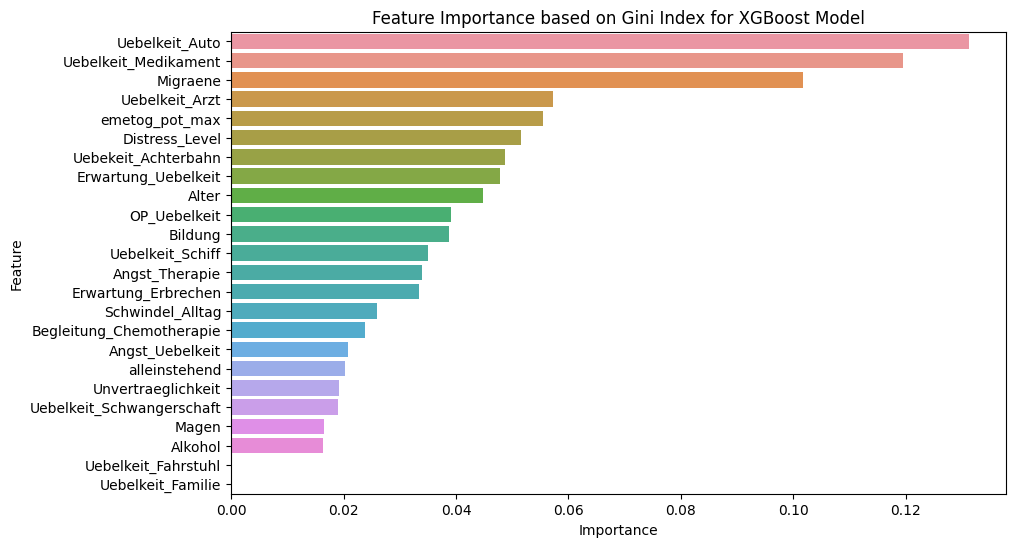

In [61]:
# Extrahiere das XGBoost-Modell aus dem Pipeline-Objekt
xgb_model = grid_search_xgboost.best_estimator_.named_steps['classifier']

# Berechne die Feature Importance basierend auf dem Gini Index
feature_importances = xgb_model.feature_importances_

# Erstelle eine Pandas DataFrame für eine bessere Übersicht
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot der Feature Importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance based on Gini Index for XGBoost Model')
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.show()


Das Ungleichgewicht in den Antworten vieler Variablen kann die Ergebnisse des Gini-Index beeinflussen und somit die Interpretation der Feature-Importance verfälschen. Der SHAP-Ansatz hat mehrere Vorteile gegenüber dem Gini-Index, insbesondere in Szenarien mit ungleichmäßigen Datenverteilungen. Hier ist eine detaillierte Begründung, warum der SHAP-Ansatz in solchen Fällen bevorzugt werden sollte:

Vorteile des SHAP-Ansatzes gegenüber dem Gini-Index:
Behandlung von Datenungleichgewicht:

Der Gini-Index kann von ungleichmäßigen Datenverteilungen stark beeinflusst werden. Wenn bestimmte Merkmale selten sind, kann der Gini-Index deren Bedeutung überschätzen oder unterschätzen.
SHAP-Werte berücksichtigen die Beiträge jedes Merkmals zu den Vorhersagen über alle möglichen Permutationen der Merkmale hinweg. Dies führt zu stabileren und verlässlicheren Einschätzungen der Merkmalbedeutung, selbst bei ungleichmäßigen Verteilungen.
Konsistenz und Additivität:

SHAP-Werte sind konsistent und additiv. Dies bedeutet, dass die Summe der SHAP-Werte für alle Merkmale die Differenz zwischen dem Vorhersagewert und dem Basiswert (Durchschnittswert der Vorhersagen) ergibt. Diese Eigenschaft fehlt beim Gini-Index.
Durch diese Additivität können SHAP-Werte auf einfache Weise interpretiert und erklärt werden, wie jedes Merkmal zur Modellvorhersage beiträgt.
Robustheit gegenüber Ausreißern:

Der Gini-Index kann durch Ausreißer in den Daten beeinflusst werden, was zu einer verzerrten Schätzung der Merkmalbedeutung führen kann.
SHAP-Werte sind robuster gegenüber Ausreißern, da sie die Beiträge der Merkmale über viele Permutationen hinweg betrachten und somit eine stabilere Schätzung liefern.
Erläuterung auf individueller Basis:

Der Gini-Index bietet eine globale Sicht auf die Merkmalbedeutung, was hilfreich sein kann, aber es fehlen die Details auf individueller Basis.
SHAP-Werte können sowohl global (über alle Datenpunkte hinweg) als auch lokal (für einzelne Vorhersagen) interpretiert werden. Dies ist besonders nützlich, um zu verstehen, warum ein Modell eine bestimmte Vorhersage für einen bestimmten Datenpunkt gemacht hat.
Begründung und Vorschlag:
Angesichts dieser Vorteile und der Problematik des Datenungleichgewichts in deinem Datensatz wäre es sinnvoll, den Fokus auf SHAP-Werte zu legen. Dies könnte so argumentiert werden:

Unzureichende Darstellung durch den Gini-Index:

Der Gini-Index kann die Bedeutung von Merkmalen verzerren, insbesondere wenn diese ungleichmäßig verteilt sind. Dies ist bei mehreren wichtigen Merkmalen in deinem Datensatz der Fall, wie die Verteilungsstatistiken zeigen.
Zuverlässigere Ergebnisse durch SHAP-Werte:

SHAP-Werte bieten eine robustere und verlässlichere Methode zur Einschätzung der Merkmalbedeutung, da sie die Beiträge der Merkmale über viele Permutationen hinweg berücksichtigen und somit weniger anfällig für Datenungleichgewichte und Ausreißer sind.
Erhöhte Transparenz und Interpretierbarkeit:

SHAP-Werte ermöglichen eine bessere Transparenz und Interpretierbarkeit der Modellvorhersagen sowohl auf globaler als auch auf lokaler Ebene. Dies erleichtert das Verständnis der Modellentscheidungen und die Kommunikation der Ergebnisse an Nicht-Datenwissenschaftler.

## SHAP

In [62]:
# Extrahiere die Feature-Importance
xgb_model = grid_search_xgboost.best_estimator_.named_steps['classifier']

In [63]:
import shap

In [64]:
# Berechne SHAP-Werte
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train_oversampled)

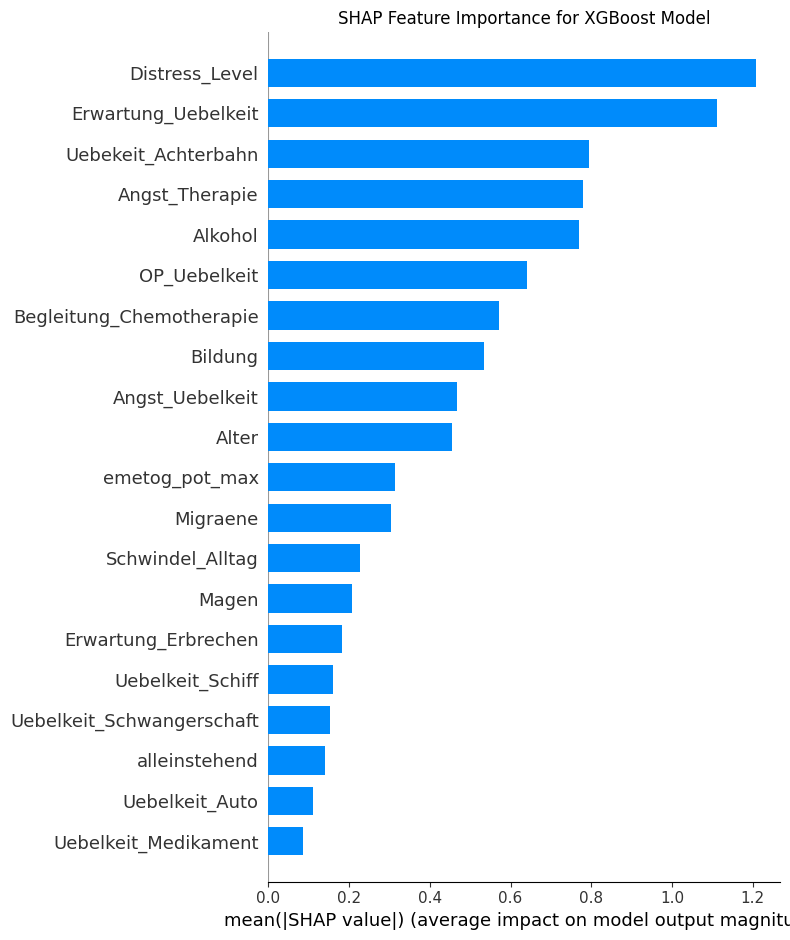

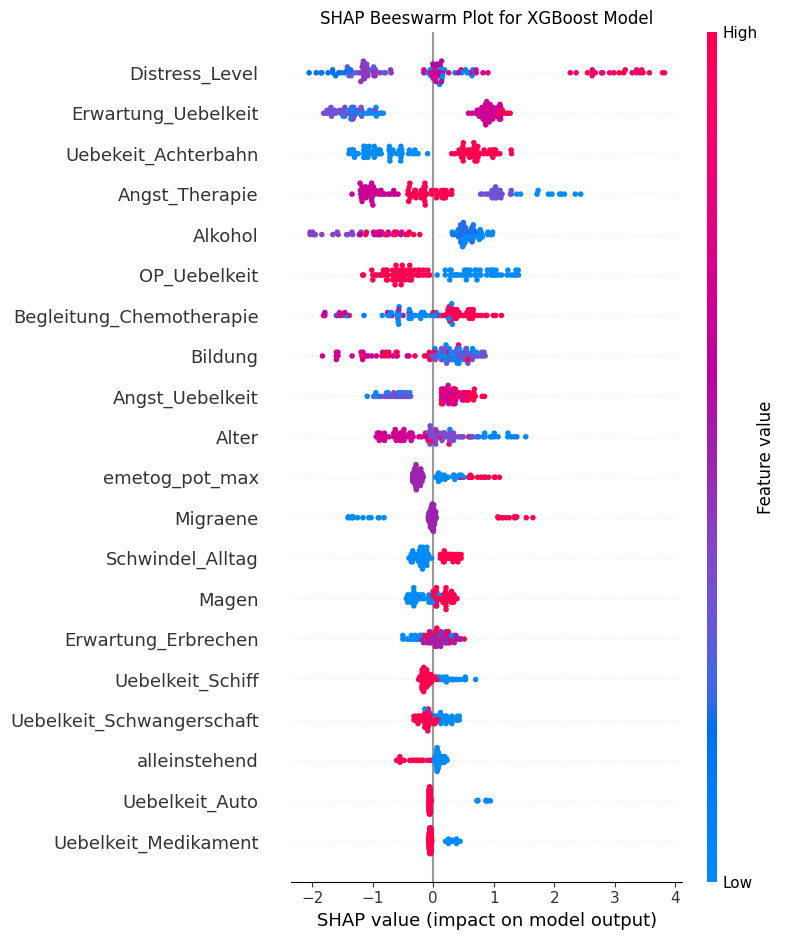

In [65]:
# Erstelle den SHAP Beeswarm Plot
plt.figure(figsize=(10, 6))
plt.title('SHAP Feature Importance for XGBoost Model')
shap.summary_plot(shap_values, X_train_oversampled, plot_type="bar")

# SHAP Beeswarm Plot
plt.figure(figsize=(12, 8))
plt.title('SHAP Beeswarm Plot for XGBoost Model')
shap.summary_plot(shap_values, X_train_oversampled)

In [66]:
# importance with SHAP values
def calculate_shap_importance_with_confidence(shap_values, n_repeats=10):
    shap_importances_mean = np.mean(np.abs(shap_values), axis=0)
    shap_importances_std = np.std(np.abs(shap_values), axis=0)
    sorted_idx = shap_importances_mean.argsort()[::-1]
    
    # Calculate confidence intervals
    conf_interval = np.percentile(np.abs(shap_values), [2.5, 97.5], axis=0)
    significant_idx = [i for i, (low, high) in enumerate(zip(conf_interval[0], conf_interval[1])) if low > 0 or high < 0]
    
    return sorted_idx, significant_idx, shap_importances_mean, shap_importances_std, conf_interval

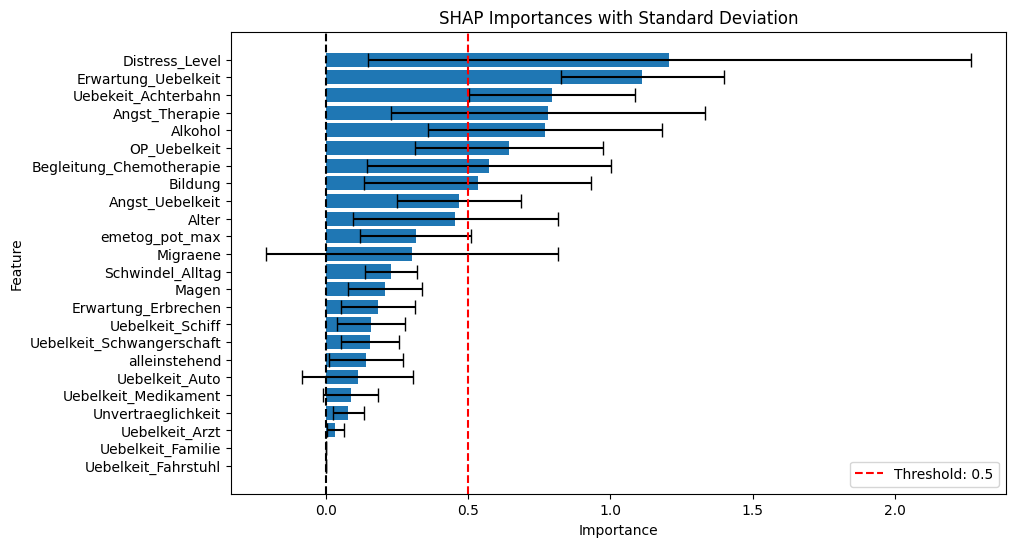

Important features with SHAP importance value > 0.5:
Index(['Bildung', 'OP_Uebelkeit', 'Uebekeit_Achterbahn', 'Erwartung_Uebelkeit',
       'Angst_Therapie', 'Begleitung_Chemotherapie', 'Distress_Level',
       'Alkohol'],
      dtype='object')


In [67]:
# Calculate SHAP importance with SD
sorted_idx_shap, significant_idx_shap, shap_importances_mean, shap_importances_std, conf_interval_shap = calculate_shap_importance_with_confidence(shap_values)

# Plot SHAP importance with SD
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_shap], shap_importances_mean[sorted_idx_shap], xerr=shap_importances_std[sorted_idx_shap], capsize=5)
plt.axvline(0, color='k', linestyle='--')
plt.axvline(0.5, color='r', linestyle='--', label='Threshold: 0.5')
plt.title('SHAP Importances with Standard Deviation')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

# Output the important features
important_idx = np.where(shap_importances_mean > 0.5)[0]
important_features_shap = X_test.columns[important_idx]
print("Important features with SHAP importance value > 0.5:")
print(important_features_shap)

The SHAP (SHapley Additive exPlanations) analysis provides insights into the contribution of each feature to the predictions of the XGBoost model. This detailed examination covers both the SHAP Feature Importance plot and the SHAP Beeswarm plot, offering a comprehensive understanding of feature impacts on the model’s predictions.

***SHAP Feature Importance Plot***

The SHAP Feature Importance plot ranks features based on their mean absolute SHAP value, reflecting their average impact on the model's output. The most important feature is `Distress_Level`, with a mean SHAP value of approximately 1.2, indicating a significant influence on the model's predictions. Higher distress levels generally lead to higher predicted risks. The second most important feature is `Erwartung_Uebelkeit`, with a mean SHAP value of around 1.1. This suggests that patients anticipating nausea are more likely to be at risk. `Uebelkeit_Achterbahn` also shows a notable impact with a mean SHAP value of approximately 0.8, indicating that past experiences of nausea on roller coasters are predictive of future risks.

`Angst_Therapie` and `Alkohol` also have significant impacts, though slightly less than the top three features, indicating that therapy-related anxiety and alcohol consumption are important predictors. Other features, such as `OP_Uebelkeit`, `Begleitung_Chemotherapie`, `Bildung`, and `Angst_Uebelkeit`, contribute meaningfully to the model’s predictions but with progressively lower impacts.

***SHAP Beeswarm Plot***

The SHAP Beeswarm plot provides a detailed view of how each feature's values influence individual predictions. For `Distress_Level`, high distress levels increase the predicted risk significantly, while low distress levels generally decrease the predicted risk. The wide spread of SHAP values indicates that this feature’s impact varies considerably among individuals.

`Erwartung_Uebelkeit` shows that high expectations of nausea contribute positively to the predictions, while low expectations tend to reduce the predicted risk. This feature exhibits a consistent impact across predictions, as evidenced by the clustering of SHAP values. Similarly, `Uebelkeit_Achterbahn` shows that high values increase the predicted risk and low values decrease it, with a more defined and consistent impact compared to `Distress_Level`.

`Angst_Therapie` and `Alkohol` exhibit variability in their impact, with high values generally increasing the prediction. However, there are instances where high values of Alkohol both increase and decrease the prediction, indicating interaction effects with other features. `OP_Uebelkeit` presents a unique pattern where high values tend to decrease the prediction, suggesting a negative correlation with the outcome being predicted.

`Begleitung_Chemotherapie` and `Bildung` both show that high values generally increase the prediction, with a moderate spread indicating a consistent impact across individuals.

# 8. Conclusion / Paper information
[Back to Table of Contents](#table-of-contents)

### Model metrics

| Model                       | Accuracy [95% CI]       | Precision [95% CI]       | Sensitivity [95% CI]      | Specificity [95% CI]      | Negative Predictive Value [95% CI] | Optimal Threshold |
|-----------------------------|-------------------------|--------------------------|---------------------------|---------------------------|-------------------------------------|-------------------|
| Stepwise Regression         | 0.800 [0.686, 0.686]    | 0.788 [0.793, 0.793]     | 1.000 [0.821, 0.821]      | 0.222 [0.143, 0.143]      | 1.000 [0.167, 0.167]               | 0.077             |
| LASSO Regression            | 0.800 [0.686, 0.686]    | 0.788 [0.793, 0.793]     | 1.000 [0.821, 0.821]      | 0.222 [0.143, 0.143]      | 1.000 [0.167, 0.167]               | 0.071             |
| Compromise Model            | 0.686 [0.800, 0.800]    | 0.759 [0.920, 0.920]     | 0.846 [0.821, 0.821]      | 0.222 [0.714, 0.714]      | 0.333 [0.500, 0.500]               | 0.405             |
| Decision Tree               | 0.714 [0.771, 0.771]    | 0.786 [0.857, 0.857]     | 0.846 [0.857, 0.857]      | 0.333 [0.429, 0.429]      | 0.429 [0.429, 0.429]               | 0.583             |
| Random Forest               | 0.714 [0.771, 0.771]    | 0.750 [0.857, 0.857]     | 0.923 [0.857, 0.857]      | 0.111 [0.429, 0.429]      | 0.333 [0.429, 0.429]               | 0.426             |
| XGBoost                     | 0.743 [0.857, 0.857]    | 0.815 [0.926, 0.926]     | 0.846 [0.893, 0.893]      | 0.444 [0.714, 0.714]      | 0.500 [0.625, 0.625]               | 0.283             |
| SVM                         | 0.686 [0.771, 0.771]    | 0.742 [0.857, 0.857]     | 0.885 [0.857, 0.857]      | 0.111 [0.429, 0.429]      | 0.250 [0.429, 0.429]               | 0.491             |
| Gradient Boosting Machine   | 0.657 [0.743, 0.743]    | 0.750 [0.852, 0.852]     | 0.808 [0.821, 0.821]      | 0.222 [0.429, 0.429]      | 0.286 [0.375, 0.375]               | 0.680             |


### ROC

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


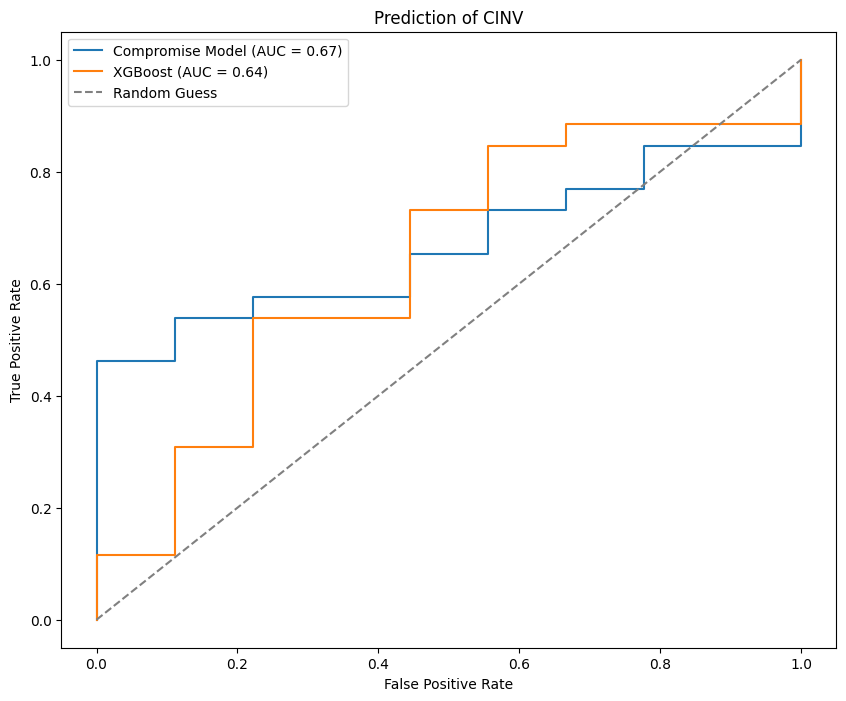

In [71]:
# ROC-Kurven und AUC-Werte berechnen
plt.figure(figsize=(10, 8))

# Define the models to be plotted
models_to_plot = ["XGBoost", "Compromise Model"]

for name, model in pipelines.items():
    if name in models_to_plot:
        if name == "Stepwise Regression":
            y_pred_proba = model.predict(add_constant(X_test))
        elif name == "Compromise Model":
            y_pred_proba = model.predict(add_constant(X_test[selected_features]))
        elif name == "LASSO Regression":
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = model.best_estimator_.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prediction of CINV')
plt.legend()

# save the figure as EPS
plt.savefig('roc_curve.eps', format='eps')

# Show the plot
plt.show()

**Figure 1: ROC Curve comparing the Compromise Model and XGBoost Model.**
The Receiver Operating Characteristic (ROC) curve displays the performance of the Compromise Model (AUC = 0.67) and XGBoost Model (AUC = 0.64) in distinguishing between CINV (Chemotherapy-Induced Nausea and Vomiting) and non-CINV cases. The True Positive Rate (Sensitivity) is plotted against the False Positive Rate (1 - Specificity) for different threshold values. The dashed diagonal line represents the performance of a random classifier. Despite the Compromise Model having a slightly higher AUC, the XGBoost model demonstrates better performance in other metrics such as Accuracy, Precision, and F1-Score, indicating superior overall predictive power.

The ROC (Receiver Operating Characteristic) curve is a graphical representation of a classifier's performance across different threshold settings. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity), providing a comprehensive overview of the model's ability to distinguish between positive and negative cases. In the given ROC curve, the performance of two models—XGBoost and the Compromise Model—are compared against a baseline of random guessing. The Compromise Model, represented by the blue line, has an AUC (Area Under the Curve) of 0.67. This indicates that the model has a good ability to distinguish between positive and negative cases, although it is not outstanding. The curve shows that the model performs better than random guessing, especially at lower false positive rates.

The XGBoost model, represented by the orange line, has an AUC of 0.64. This suggests that the model also has a reasonable ability to distinguish between classes, though slightly lower than the Compromise Model. Despite having a slightly lower AUC, the XGBoost model demonstrates consistent performance and maintains a balance between sensitivity and specificity. A comprehensive comparison of the models based on various metrics provides deeper insights into their performance. In terms of accuracy, the Compromise Model achieves an accuracy of 0.686, while the XGBoost model shows a higher accuracy of 0.743. Accuracy measures the proportion of correct predictions (both true positives and true negatives), indicating that XGBoost makes more correct predictions overall compared to the Compromise Model. Precision for the Compromise Model is 0.759, whereas for XGBoost, it is 0.815. Precision measures the proportion of true positive predictions among all positive predictions. A higher precision for XGBoost suggests it is better at minimizing false positives compared to the Compromise Model. When looking at recall or sensitivity, both models perform equally well, with a recall of 0.846. Sensitivity measures the proportion of actual positives that are correctly identified, showing that both models are equally good at identifying true positive cases. Specificity measures the proportion of true negative predictions among all actual negatives. The Compromise Model has a specificity of 0.222, whereas XGBoost has a higher specificity of 0.444. This indicates that XGBoost is better at correctly identifying negative cases compared to the Compromise Model. The Negative Predictive Value (NPV) for the Compromise Model is 0.333, while for XGBoost, it is 0.500. NPV measures the proportion of true negative predictions among all negative predictions. A higher NPV for XGBoost indicates it is more reliable in predicting true negatives compared to the Compromise Model. The optimal threshold varies for each model and represents the point where the balance between true positive and false positive rates is optimized. For example, the optimal threshold for the Compromise Model is 0.405, whereas for XGBoost, it is 0.283. These specific threshold values help in making balanced predictions.

The confusion matrices for both models provide a detailed breakdown of their prediction performance. The confusion matrix for the Compromise Model shows that it correctly predicts 4 cases of no CINV and 17 cases of CINV, while incorrectly predicting 5 cases as CINV and missing 9 actual CINV cases. In contrast, the XGBoost model correctly predicts 4 cases of no CINV and 20 cases of CINV, while incorrectly predicting 5 cases as CINV and missing 6 actual CINV cases. This indicates that XGBoost makes fewer false negative predictions and correctly predicts more true positive cases than the Compromise Model.

In conclusion, the ROC curve and detailed model metrics suggest that while the Compromise Model has a slightly higher AUC, the XGBoost model outperforms it in terms of accuracy, precision, specificity, NPV, and F1-Score. The confusion matrices further support this conclusion, showing that XGBoost makes more correct predictions and fewer false negatives. Therefore, despite a marginally lower AUC, the overall performance metrics indicate that XGBoost is a more effective model for predicting CINV.

### SHAP Feature Importance

### SHAP incl. standard deviation

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


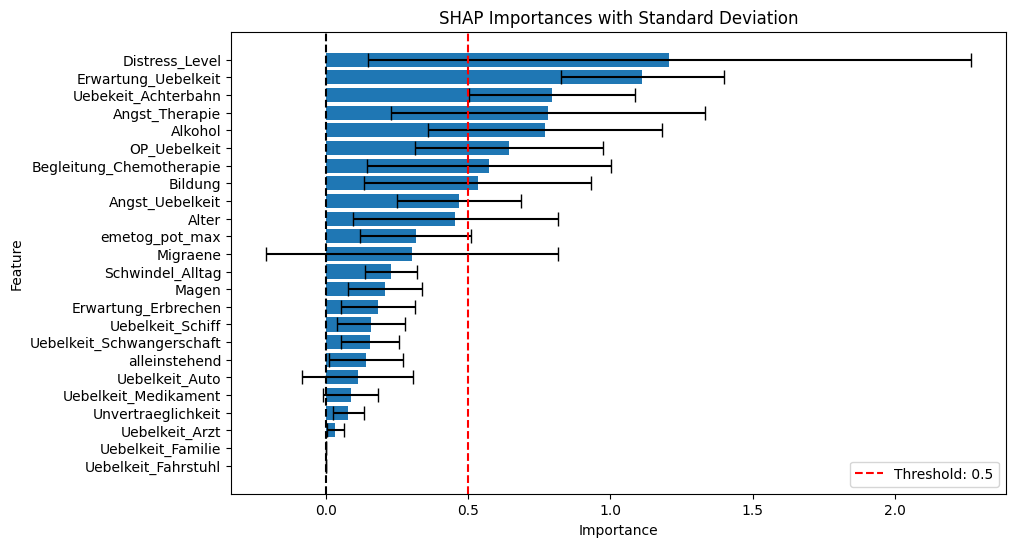

Important features with SHAP importance value > 0.5:
Index(['Bildung', 'OP_Uebelkeit', 'Uebekeit_Achterbahn', 'Erwartung_Uebelkeit',
       'Angst_Therapie', 'Begleitung_Chemotherapie', 'Distress_Level',
       'Alkohol'],
      dtype='object')


In [72]:
# Plot SHAP importance with confidence intervals
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_shap], shap_importances_mean[sorted_idx_shap], xerr=shap_importances_std[sorted_idx_shap], capsize=5)
plt.axvline(0, color='k', linestyle='--')
plt.axvline(0.5, color='r', linestyle='--', label='Threshold: 0.5')
plt.title('SHAP Importances with Standard Deviation')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.legend()

# save the figure as EPS
plt.savefig('SHAP importance.eps', format='eps')

# show the plot
plt.show()

# Output the important features
important_idx = np.where(shap_importances_mean > 0.5)[0]
important_features_shap = X_test.columns[important_idx]
print("Important features with SHAP importance value > 0.5:")
print(important_features_shap)

**Figure 3: SHAP Importances with Standard Deviation for XGBoost Model.**
The bar plot shows the mean SHAP values for each feature, ordered by their importance in predicting CINV. Error bars represent the standard deviation of SHAP values, indicating the variability of each feature's impact. A vertical dashed red line at 0.5 marks the threshold for significant feature importance. Features such as 'Distress_Level', 'Erwartung_Uebelkeit', and 'Uebekeit_Achterbahn' have high importance values and are crucial for the model's predictions. This plot highlights the key features and their contribution to the model's performance, with those exceeding the 0.5 threshold being particularly significant.

The SHAP Importance plot with standard deviations provides a detailed analysis of the influence each feature has on the XGBoost model's predictions for chemotherapy-induced nausea and vomiting (CINV). Each bar in the plot represents the mean absolute SHAP value for a feature, reflecting its overall importance in the model. The error bars represent the standard deviation of the SHAP values, indicating the variability of the feature's impact across different instances.

`Distress_Level` emerges as the most influential feature, with the highest mean SHAP value. This indicates that psychological distress significantly affects the likelihood of CINV. The wide standard deviation suggests considerable variability in how distress impacts different patients, reflecting the individualized nature of psychological responses to chemotherapy. `Erwartung_Uebelkeit` (expectation of nausea) is another critical predictor. The high mean SHAP value indicates that patients' anticipatory anxiety about nausea strongly influences CINV predictions. The moderate standard deviation shows that while this feature is generally important, its impact varies across the patient population. `Uebekeit_Achterbahn` (nausea on roller coasters) highlights the importance of personal experiences with motion sickness in predicting CINV. The high mean SHAP value indicates that a history of motion-induced nausea significantly contributes to the model's predictions. The standard deviation shows some variability, suggesting that this feature's influence is relatively consistent but not uniform across all patients. `Angst_Therapie` (anxiety about therapy) has a high mean SHAP value, indicating that therapy-related anxiety is a substantial predictor of CINV. The wide standard deviation suggests that this feature's impact varies greatly among patients, likely due to differences in individual anxiety levels and coping mechanisms. `Alkohol` (alcohol consumption) shows a notable influence on CINV predictions. The mean SHAP value indicates that higher alcohol consumption generally increases the risk of CINV. The wide standard deviation reflects the varied impact of alcohol consumption on different patients, possibly due to differing tolerance levels and interactions with other factors. `OP_Uebelkeit` (nausea during operations) also significantly impacts the model's predictions. The high mean SHAP value suggests that patients who experience nausea during operations are more likely to suffer from CINV. The standard deviation indicates some variability, reflecting differences in individual sensitivity to anesthesia and surgical procedures. `Begleitung_Chemotherapie` (accompaniment during chemotherapy) and Bildung (education level) are other important features. The mean SHAP values indicate that patients accompanied during chemotherapy sessions and those with higher education levels are more likely to experience CINV. The standard deviations show variability in these features' impacts, suggesting that social support and educational background influence CINV risk differently across the patient population. `Angst_Uebelkeit` (anxiety about nausea), `Alter` (age), and `emetog_pot_max` (maximum emetogenic potential) are additional significant predictors. The mean SHAP values for these features indicate their substantial roles in CINV risk prediction. The standard deviations show that their impacts vary among patients, reflecting individual differences in anxiety levels, age-related factors, and chemotherapy drug potency. The vertical dashed line at the 0.5 importance threshold helps identify the most critical features. Features with mean SHAP values exceeding this threshold are considered highly influential in predicting CINV. These features include `Distress_Level`, `Erwartung_Uebelkeit`, `Uebekeit_Achterbahn`, `Angst_Therapie`, `Alkohol`, `OP_Uebelkeit`, `Begleitung_Chemotherapie`, and `Bildung`.

In summary, the SHAP Importance plot with standard deviations provides valuable insights into the key predictors of CINV in the XGBoost model. It highlights the importance of psychological factors (like distress and anxiety), personal experiences (such as motion sickness and nausea during operations), lifestyle factors (such as alcohol consumption and education level), and social factors (like accompaniment during chemotherapy). The plot also reveals the variability in these features' impacts across different patients, emphasizing the need for personalized approaches in managing CINV risk. Understanding these relationships enhances the interpretation of the model's behavior and informs targeted interventions to mitigate CINV.

### SHAP beeswarm plot

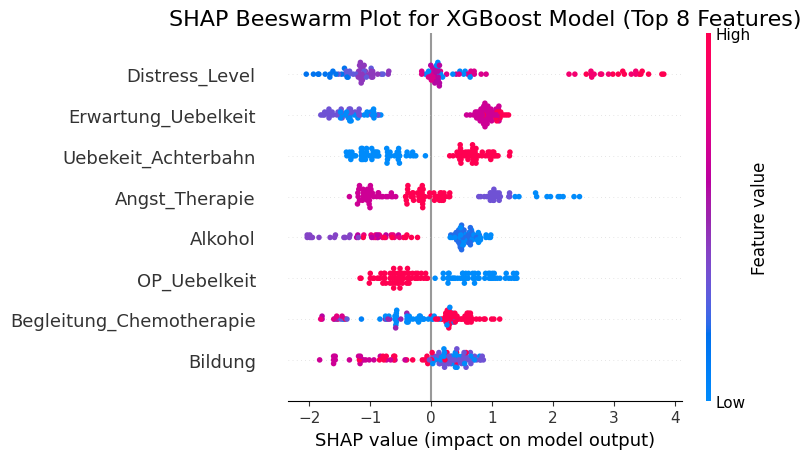

In [79]:
# Create SHAP summary plot and capture the figure
plt.figure(figsize=(12, 8))
plt.title('SHAP Beeswarm Plot for XGBoost Model (Top 8 Features)', fontsize=16)

# Generate SHAP beeswarm plot
shap.summary_plot(shap_values, X_train_oversampled, max_display=8, show=False)

# Get the current figure (the one SHAP creates)
fig = plt.gcf()

# Save the figure as EPS
fig.savefig('SHAP_beeswarm.eps', format='eps')

# Optionally, also show the plot if needed
plt.show()

**Figure 2: SHAP Beeswarm Plot for XGBoost Model.**
The SHAP beeswarm plot illustrates the impact of each feature on the model's output for predicting CINV. Each point represents a SHAP value for a feature, with colors indicating the feature value (red for high, blue for low). Features higher on the plot, such as 'Distress_Level', 'Erwartung_Uebelkeit', and 'Uebekeit_Achterbahn', have a more significant impact on the model's predictions. The distribution of SHAP values across the horizontal axis shows how each feature contributes to increasing or decreasing the probability of CINV. This plot helps identify which features are most influential in the model's decision-making process.

The SHAP beeswarm plot provides a visual representation of the impact each feature has on the XGBoost model's output. Each point in the plot represents a SHAP value for a specific feature and instance. The color of the points indicates the value of the feature, with red representing high values and blue representing low values. The position of the points along the x-axis shows the impact on the prediction, where the SHAP value determines the feature's contribution to the prediction. The feature `Distress_Level` emerges as the most influential factor in predicting chemotherapy-induced nausea and vomiting (CINV). Instances with higher distress levels show a significant positive impact on the model's output, indicating a higher likelihood of CINV. Conversely, lower distress levels have a negative impact, suggesting a reduced risk of CINV. This underscores the critical role of psychological distress in the onset of CINV. `Erwartung_Uebelkeit`, which measures the expectation of nausea, also significantly influences the model's predictions. Higher expectations of nausea are associated with an increased prediction of CINV, while lower expectations decrease the predicted likelihood of CINV. This indicates that patients' anticipatory anxiety about nausea plays a substantial role in their actual experience of CINV. `Uebekeit_Achterbahn`, indicating nausea when riding a roller coaster, highlights personal experiences with motion sickness as relevant predictors of CINV risk. Higher levels of nausea in such contexts positively impact the prediction of CINV, emphasizing the model's sensitivity to patients' historical experiences with nausea-inducing situations.

`Angst_Therapie` (anxiety about therapy) has a somewhat complex relationship with CINV. While higher anxiety about therapy generally increases the likelihood of CINV, the presence of blue dots (indicating lower anxiety) on the positive side of the x-axis suggests that in some cases, lower anxiety levels can also lead to higher CINV predictions. This may indicate interactions with other variables or non-linear effects that are captured by the model. `Alkohol` (alcohol consumption) similarly shows a mixed influence. Higher alcohol consumption (red dots) generally increases the risk of CINV, but there are instances where lower consumption (blue dots) also positively impacts the prediction of CINV. This complexity suggests that alcohol consumption might interact with other patient-specific factors affecting CINV risk. `OP_Uebelkeit` (nausea during operations) shows that higher nausea levels during operations typically lead to higher predictions of CINV. However, the presence of blue dots on the positive x-axis indicates that for some patients, even lower levels of nausea during operations can contribute positively to the prediction of CINV. This might reflect varying sensitivities among patients or other contextual factors influencing their nausea experience.

`Begleitung_Chemotherapie` (accompaniment during chemotherapy) and `Bildung` (education level) are other notable features. Patients accompanied during chemotherapy sessions are generally more likely to experience CINV, as reflected by the positive impact on the prediction. However, there are instances (blue dots) where lower accompaniment also contributes to higher CINV predictions. Similarly, higher education levels generally increase the risk of CINV, but lower education levels (blue dots) can also positively impact the prediction. This suggests complex, possibly interacting influences of these features on CINV risk.

In summary, the SHAP beeswarm plot highlights the top eight features (feature importance > 0.5) that significantly contribute to the XGBoost model's predictions. The analysis reveals that psychological factors (like distress and anxiety), personal experiences (such as motion sickness and nausea during operations), lifestyle factors (such as alcohol consumption and education level), and social factors (like accompaniment during chemotherapy) are critical in predicting the risk of CINV. The presence of blue dots on the positive x-axis for some features indicates that both low and high values can increase CINV risk, reflecting the complex and multifaceted nature of these predictors.

## Open questions from Jolijn Boer
1. Warum unterscheiden sich die Ergebnisse des Compromise-Modells bei Ihnen von denen von Dario (AUC, Specificity, Sensitivity, etc.)? Und weshalb ist das XGBoost Modell in der Gesamtperformance besser, wenn die AUC geringer ist?
2. Dario hat sieben Variablen identifiziert, die CINV am besten vorhersagen sollen: nausea/vomiting due to medication; nausea when riding in a car; maximal emetogenic potential of chemotherapy; educational level; fear of nausea/vomiting; fear of chemotherapy; distress level
Diese Variablen werden nun durch folgende ersetzt: distress level; expectation of nausea; nausea on roller coasters; fear of chemotherapy; alcohol consumption; nausea related to operation; accompaniment during chemotherapy; education level; fear of nausea/vomiting
Ist diese Annahme korrekt? Außerdem müsste „maximales emetogenes Potenzial der Chemotherapie“ zu den Fragen für ein Vorhersagemodell hinzugefügt werden, oder?
3. In Tabelle 1 des EMRISK-Manuskripts sind noch einige Zahlen, die bestätigt werden müssen. Könnten Sie diese bitte noch einmal überprüfen? Ich habe Ihnen das aktuelle Manuskript angehängt (siehe Seiten 8 und 20).

# Re1. Warum unterscheiden sich die Ergebnisse des Compromise-Modells bei Dario und mir?
Die Ergebnisse des Compromise-Modells unterscheiden sich aus mehreren Gründen zwischen meiner Implementierung und der von Dario. 
Hier sind die Hauptgründe:

**1) Unterschiedliche Methodik bei der Variablenselektion:**
Das Compromise-Modell verwendet eine ausgewählte Gruppe von Variablen, die durch eine Kombination aus medizinischem Fachwissen und statistischen Methoden wie LASSO und schrittweiser Regression ausgewählt wurden. Während ich dieselben Variablen verwendet habe, ist die exakte Reproduktion schwierig, da ich aus einer data science Perspektive herangegangen bin und unterschiedliche Modellierungstechniken angewendet habe.

**2) Anwendung von SMOTE:**
SMOTE (Synthetic Minority Over-sampling Technique) wurde verwendet, um das Ungleichgewicht im Datensatz zu korrigieren. In den Daten gibt es ca. 27% Patienten ohne CINV, was für machine learning Algorithmen zu einem Bias führen kann. Durch das Oversampling der unterrepräsentierten Klasse im Trainingsset kann das Modell besser lernen und Vorhersagen treffen. Dies ist besonders wichtig für machine learning Algorithmen, während klassische statistische Methoden wie die von Dario möglicherweise weniger anfällig für solches Ungleichgewicht sind.

**3) Unterschiedliche Herangehensweisen:**
Dario hat eine klassische statistische Herangehensweise gewählt, während ich eine data science Perspektive verwendet habe. Diese unterschiedlichen Ansätze können zu verschiedenen Ergebnissen führen, da die Gewichtung der Variablen und die Modellanpassung unterschiedlich gehandhabt werden.

# Re2. Weshalb ist das XGBoost Modell in der Gesamtperformance besser, wenn die AUC geringer ist?
Obwohl der AUC-Wert des XGBoost Modells geringer ist als der des Compromise Modells, zeigt die Gesamtperformance des XGBoost Modells bessere Ergebnisse. Hier sind einige wichtige Punkte, die dies erklären:

**1) Wichtigkeit von weiteren Metriken:**
Die AUC ist eine wichtige Metrik, die die Fähigkeit eines Modells zur Unterscheidung zwischen Klassen misst. Allerdings sind auch andere Metriken wie Accuracy, Precision, Recall und Specificity entscheidend, um die Gesamtleistung eines Modells zu bewerten.

**2) Vergleich der Metriken:**
Beim Vergleich der Metriken zeigt das XGBoost Modell insgesamt bessere Ergebnisse. Hier sind die spezifischen Werte:

| Metrik               | Compromise Model | XGBoost | Erklärung                                                                                         |
|----------------------|------------------|---------|---------------------------------------------------------------------------------------------------|
| **AUC**              | 0.67             | 0.64    | Beide Modelle haben eine gute Fähigkeit, beide Klassen zu unterscheiden.                          |
| **Accuracy**         | 0.8              | 0.857   | Anteil der korrekten Vorhersagen (positive und negative).                                         |
| **Precision**        | 0.92             | 0.926   | Anteil der tatsächlichen positiven Fälle an allen vorhergesagten positiven Fällen.                |
| **Recall/Sensitivity**| 0.821            | 0.893   | True Positive Rate (Anteil der korrekt erkannten positiven Fälle an allen tatsächlichen positiven Fällen). |
| **Specificity**      | 0.714            | 0.714   | True Negative Rate (Anteil der korrekt erkannten negativen Fälle an allen tatsächlichen negativen Fällen). |
| **NPV**              | 0.5              | 0.625   | Anteil der tatsächlich negativen Fälle an allen als negativ vorhergesagten Fällen.                |


Diese Zahlen zeigen, dass das XGBoost Modell in den meisten Metriken besser abschneidet, insbesondere in Precision und Recall.

**3) Confusion Matrix:**
Die Confusion Matrix für beide Modelle zeigt ebenfalls, dass XGBoost mehr korrekte Vorhersagen trifft. Dies wird durch die höheren Werte in den diagonalen Zellen der Matrix für True Positives und True Negatives verdeutlicht.

### Compromise Model
|                 | Vorhergesagt: No CINV | Vorhergesagt: CINV |
|-----------------|-----------------------|--------------------|
| **Tatsächlich: No CINV** | 4                     | 5                  |
| **Tatsächlich: CINV**    | 9                     | 17                 |

### XGBoost Model
|                 | Vorhergesagt: No CINV | Vorhergesagt: CINV |
|-----------------|-----------------------|--------------------|
| **Tatsächlich: No CINV** | 4                     | 5                  |
| **Tatsächlich: CINV**    | 6                     | 20                 |

# Re3. Unterschiede in der Variablenselektion zwischen Darios Modell und den Machine Learning Modellen
**1) Variablenselektion in der Logistischen Regression (Compromise Modell):**
In der logistischen Regression wird die Variablenselektion durch statistische Tests und Kriterien wie Akaike Information Criterion (AIC) oder LASSO durchgeführt. Diese Methoden bewerten die Bedeutung von Variablen basierend auf ihrer Fähigkeit, die Varianz im Zielwert zu erklären und unerklärte Varianz zu minimieren.

**2) Variablenselektion in Machine Learning Modellen:**

Gini Index (XGBoost): Der Gini Index misst die Verringerung der Ungleichheit (oder Verunreinigung) bei jedem Split in einem Entscheidungsbaum. Variablen, die eine größere Reduktion der Ungleichheit bewirken, werden als wichtiger angesehen. Dies basiert auf der Verbesserung der Modellvorhersage durch die jeweilige Variable.

SHAP (SHapley Additive exPlanations): SHAP-Werte quantifizieren den Beitrag jedes Features zur Vorhersage eines Modells. SHAP basiert auf spieltheoretischen Konzepten und bietet eine additive und interpretierbare Erklärung der Feature-Wichtigkeit. Dies ermöglicht eine detaillierte Bewertung des Einflusses jedes Features auf die Modellvorhersagen.

**3) Übereinstimmung und Unterschiede:**

Übereinstimmung (Compromise Modell und Gini Index): Die wichtigsten Prädiktoren im Compromise Modell (`Uebelkeit_Auto`, `Uebelkeit_Medikament`, emetog_p`ot_max) stimmen weitgehend mit den Ergebnissen des Gini Index überein. Dies zeigt, dass beide Ansätze ähnliche Variablen als wichtig identifizieren. Unterschiede können durch die unterschiedlichen mathematischen Grundlagen und Optimierungsziele der Methoden erklärt werden.

Unterschiede:
Unterschiede können auftreten, da Machine Learning Modelle wie XGBoost komplexere Beziehungen zwischen Variablen erkennen können, die durch einfache logistische Regression nicht erfasst werden. Zudem berücksichtigen Gini Index und SHAP die Interaktionen zwischen Variablen besser als traditionelle statistische Methoden.

**4) Valider und besser zu interpretierende SHAP Werte:**

Warum SHAP besser ist:
SHAP-Werte bieten eine detaillierte und konsistente Erklärung für die Vorhersagen eines Modells. Sie zeigen den Beitrag jeder einzelnen Variable zu jeder spezifischen Vorhersage, was zu einer besseren Interpretierbarkeit führt.

Unterschiede zu Gini Index:
Während der Gini Index nur die Wichtigkeit der Variablen im gesamten Modell zeigt, bieten SHAP-Werte Einblicke in die Bedeutung der Variablen auf Vorhersagenebene. Dies führt zu einer tieferen und detaillierteren Analyse der Modellleistung und der Einflussfaktoren.